In [1]:
import pandas as pd
import json
import requests
import pickle

In [2]:
from bs4 import BeautifulSoup
import requests

exotic_cocktails_url = 'https://www.pubclub.com/lifestyle/8-exotic-cocktails-from-around-the-world-that-you-must-try-at-your-next-party/'
cocktails_filepath = 'cocktail_recipe_sources/'
exotic_cocktails_filename = '8%20Exotic%20Cocktails%20From%20Around%20The%20World%20That%20You%20Must%20Try%20At%20Your%20Next%20Party.html'
#exotic_cocktails_response = requests.get(exotic_cocktails_url)
#print( exotic_cocktails_response.status_code )
#exotic_cocktails_page = exotic_cocktails_response.text
#soup = BeautifulSoup(exotic_cocktails_page, "lxml")


with open(cocktails_filepath + '8_exotic_cocktail_recipies.html') as fp:
    soup = BeautifulSoup(fp, "lxml")

In [3]:
cocktail_names = soup.find_all('h3', class_='western')
#cocktails = soup.find_all('h4', class_='western')
#for c in cocktails:
cocktail_dict = {}
for c_name in cocktail_names:
    cocktail_name = c_name.text
    #print(cocktail_name)
    c = c_name.find_next_sibling('p').find_next_sibling('h4', class_='western')
    
    if c.text =='Ingredients':
        #print( c )
        ul = c.find_next_sibling('p').find_next_sibling('ul')
        ing_list = ul.find_all('li')
        list_of_ingredients = []
        for ing in ing_list:
            #print( ing )
            list_of_ingredients.append(ing.text.strip())
    cocktail_dict[cocktail_name] = list_of_ingredients    
            
print( cocktail_dict )   

{'1.Rosé All Day Cocktail': ['Bottle Rosé', 'Vodka', 'Blackberries', 'Lime Juice', 'Honey', 'Lime', 'Raspberries', 'Strawberries', 'Ice'], '2.Lychee Martini': ['Ice cubes', 'vodka', 'lychee juice', 'orange bitters', 'lychees', 'lemon juice'], 'Preparation': ['rhubarb stalks', 'frozen raspberries', 'raw sugar cane', 'lemon juice'], '3.Raspberry-Rhubarb Collins Punch': ['rhubarb stalks', 'frozen raspberries', 'raw sugar cane', 'lemon juice'], '4.Turmeric Colada': ['Ice', 'white rum', 'turmeric cordial', 'coconut milk', 'pineapple juice', 'lime juice', 'simple syrup', 'pineapple.'], '5.PINA COLADA': ['Ice', 'white rum', 'dark rum', 'coconut cream', 'double cream or whipping cream', 'pineapple juice', 'Dash of angostura bitters', 'Maraschino cherries', 'Pineapple slices'], '6.Fruity Margarita Punch': ['fruit punch', 'tequila', 'triple sec (Cointreau)', 'lime juice', 'Oranges', 'limes'], '7.Watermelon Lemonade Margarita': ['tequila', 'triple sec', 'Midori', 'watermelon juice', 'lemonade']}


In [4]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

In [5]:
exotic_c_word_list = []

for ct in cocktail_dict:
     exotic_c_word_list.extend( cocktail_dict[ct] )

In [6]:
exotic_c_word_list = [lemmatizer.lemmatize(s.lower()) for s in exotic_c_word_list]
exotic_c_word_list

['bottle rosé',
 'vodka',
 'blackberry',
 'lime juice',
 'honey',
 'lime',
 'raspberry',
 'strawberry',
 'ice',
 'ice cubes',
 'vodka',
 'lychee juice',
 'orange bitters',
 'lychee',
 'lemon juice',
 'rhubarb stalks',
 'frozen raspberries',
 'raw sugar cane',
 'lemon juice',
 'rhubarb stalks',
 'frozen raspberries',
 'raw sugar cane',
 'lemon juice',
 'ice',
 'white rum',
 'turmeric cordial',
 'coconut milk',
 'pineapple juice',
 'lime juice',
 'simple syrup',
 'pineapple.',
 'ice',
 'white rum',
 'dark rum',
 'coconut cream',
 'double cream or whipping cream',
 'pineapple juice',
 'dash of angostura bitters',
 'maraschino cherries',
 'pineapple slices',
 'fruit punch',
 'tequila',
 'triple sec (cointreau)',
 'lime juice',
 'orange',
 'lime',
 'tequila',
 'triple sec',
 'midori',
 'watermelon juice',
 'lemonade']

In [7]:
with open("data/" + "exotic_c_word_list.pickle", 'wb') as to_write:
    pickle.dump(exotic_c_word_list, to_write)

In [8]:
drink_url_stem ='https://www.thecocktaildb.com/api/json/v2/9973533/lookup.php?i='
alcohol_api_url = 'https://www.thecocktaildb.com/api/json/v2/9973533/filter.php?a=Alcoholic'

In [9]:
drink_url_stem ='https://www.thecocktaildb.com/api/json/v2/9973533/lookup.php?i='

def cocktail_list_from_cocktail_db():
    f=alcohol_api_url
    data = requests.get(f)    
    parsed_json = json.loads(data.text)   
    drink_dict_list = []
    
    for i in (parsed_json["drinks"]):
        drink_id = i["idDrink"]
        drink_url = drink_url_stem + drink_id
        r_data = requests.get(drink_url)
        drink_dict = r_data.json()['drinks'][0]
        drink_dict_list.append(drink_dict)
    return( drink_dict_list )

cocktail_db_list = cocktail_list_from_cocktail_db() 
#print( cocktail_db_list )  

with open("data/" + "cocktail_db_list.pickle", 'wb') as to_write:
    pickle.dump(cocktail_db_list, to_write)

In [10]:
with open("data/" + "cocktail_dict.pickle", 'wb') as to_write:
    pickle.dump(cocktail_dict, to_write)

## Read in previously collected data

In [11]:
#import pickle
with open("data/" + "cocktail_db_list.pickle", 'rb') as to_read:
    cocktail_db_list =  pickle.load(to_read)

In [12]:
with open("data/" + "exotic_c_word_list.pickle", 'rb') as to_read:
    exotic_c_word_list =  pickle.load(to_read)


In [13]:
cocktail_db_list

[{'idDrink': '14029',
  'strDrink': "'57 Chevy with a White License Plate",
  'strDrinkAlternate': None,
  'strDrinkES': None,
  'strDrinkDE': None,
  'strDrinkFR': None,
  'strDrinkZH-HANS': None,
  'strDrinkZH-HANT': None,
  'strTags': None,
  'strVideo': None,
  'strCategory': 'Cocktail',
  'strIBA': None,
  'strAlcoholic': 'Alcoholic',
  'strGlass': 'Highball glass',
  'strInstructions': '1. Fill a rocks glass with ice 2.add white creme de cacao and vodka 3.stir',
  'strInstructionsES': None,
  'strInstructionsDE': '1. Füllen Sie ein Rocks Glas mit Eis 2. Geben Sie weiße Creme de Kakao und Wodka hinzu. 3. Umrühren.',
  'strInstructionsFR': None,
  'strInstructionsZH-HANS': None,
  'strInstructionsZH-HANT': None,
  'strDrinkThumb': 'https://www.thecocktaildb.com/images/media/drink/qyyvtu1468878544.jpg',
  'strIngredient1': 'Creme de Cacao',
  'strIngredient2': 'Vodka',
  'strIngredient3': None,
  'strIngredient4': None,
  'strIngredient5': None,
  'strIngredient6': None,
  'strIngre

In [14]:
cocktail_db_df = pd.DataFrame(cocktail_db_list)

In [15]:
cocktail_db_df.columns

Index(['idDrink', 'strDrink', 'strDrinkAlternate', 'strDrinkES', 'strDrinkDE',
       'strDrinkFR', 'strDrinkZH-HANS', 'strDrinkZH-HANT', 'strTags',
       'strVideo', 'strCategory', 'strIBA', 'strAlcoholic', 'strGlass',
       'strInstructions', 'strInstructionsES', 'strInstructionsDE',
       'strInstructionsFR', 'strInstructionsZH-HANS', 'strInstructionsZH-HANT',
       'strDrinkThumb', 'strIngredient1', 'strIngredient2', 'strIngredient3',
       'strIngredient4', 'strIngredient5', 'strIngredient6', 'strIngredient7',
       'strIngredient8', 'strIngredient9', 'strIngredient10',
       'strIngredient11', 'strIngredient12', 'strIngredient13',
       'strIngredient14', 'strIngredient15', 'strMeasure1', 'strMeasure2',
       'strMeasure3', 'strMeasure4', 'strMeasure5', 'strMeasure6',
       'strMeasure7', 'strMeasure8', 'strMeasure9', 'strMeasure10',
       'strMeasure11', 'strMeasure12', 'strMeasure13', 'strMeasure14',
       'strMeasure15', 'strImageSource', 'strImageAttribution',
   

In [16]:
import copy
reordered_cols = copy.deepcopy(cocktail_db_df.columns)
reordered_cols = [cocktail_db_df.columns[1],cocktail_db_df.columns[0]]
reordered_cols.extend(cocktail_db_df.columns[2:])
reordered_cols
cocktail_db_df = cocktail_db_df[reordered_cols]
cocktail_db_df

strDrink idDrink strDrinkAlternate  \
0    '57 Chevy with a White License Plate   14029              None   
1                          1-900-FUK-MEUP   15395              None   
2                        110 in the shade   15423              None   
3                  151 Florida Bushwacker   14588              None   
4                             155 Belmont   15346              None   
..                                    ...     ...               ...   
540                        Zizi Coin-coin   14594              None   
541                                Zoksel   15691              None   
542                                Zombie   17241              None   
543                             Zorbatini   16963              None   
544                                 Zorro   15328              None   

    strDrinkES strDrinkDE strDrinkFR strDrinkZH-HANS strDrinkZH-HANT strTags  \
0         None       None       None            None            None    None   
1         None       None       None            None            None    None   
2         None       None       None            None            None    None   
3         None       None       None            None            None    None   
4         None       None       None            None            None    None   
..         ...        ...        ...             ...             ...     ...   
540       None       None       None            None            None    None   
541       None       None       None            None            None    None   
542       None       None       None            None            None    None   
543       None       None       None            None            None    None   
544       None       None       None            None            None    None   

    strVideo  ... strMeasure10 strMeasure11 strMeasure12 strMeasure13  \
0       None  ...         None         None         None         None   
1       None  ...         None         None         None         None   
2       None  ...         None         None         None         None   
3       None  ...         None         None         None         None   
4       None  ...         None         None         None         None   
..       ...  ...          ...          ...          ...          ...   
540     None  ...         None         None         None         None   
541     None  ...         None         None         None         None   
542     None  ...         None         None         None         None   
543     None  ...         None         None         None         None   
544     None  ...         None         None         None         None   

    strMeasure14 strMeasure15 strImageSource strImageAttribution  \
0           None         None           None                None   
1           None         None           None                None   
2           None         None           None                None   
3           None         None           None                None   
4           None         None           None                None   
..           ...          ...            ...                 ...   
540         None         None           None                None   
541         None         None           None                None   
542         None         None           None                None   
543         None         None           None                None   
544         None         None           None                None   

    strCreativeCommonsConfirmed         dateModified  
0                            No  2016-07-18 22:49:04  
1                            No  2016-07-18 22:27:04  
2                            No  2016-02-03 14:51:57  
3                            No  2016-07-18 22:28:43  
4                            No  2016-10-05 12:36:28  
..                          ...                  ...  
540                          No  2017-01-28 16:25:52  
541                          No  2017-01-28 16:28:50  
542                          N

In [17]:
cocktail_db_df[cocktail_db_df['strDrink'] == '11001']

Empty DataFrame
Columns: [strDrink, idDrink, strDrinkAlternate, strDrinkES, strDrinkDE, strDrinkFR, strDrinkZH-HANS, strDrinkZH-HANT, strTags, strVideo, strCategory, strIBA, strAlcoholic, strGlass, strInstructions, strInstructionsES, strInstructionsDE, strInstructionsFR, strInstructionsZH-HANS, strInstructionsZH-HANT, strDrinkThumb, strIngredient1, strIngredient2, strIngredient3, strIngredient4, strIngredient5, strIngredient6, strIngredient7, strIngredient8, strIngredient9, strIngredient10, strIngredient11, strIngredient12, strIngredient13, strIngredient14, strIngredient15, strMeasure1, strMeasure2, strMeasure3, strMeasure4, strMeasure5, strMeasure6, strMeasure7, strMeasure8, strMeasure9, strMeasure10, strMeasure11, strMeasure12, strMeasure13, strMeasure14, strMeasure15, strImageSource, strImageAttribution, strCreativeCommonsConfirmed, dateModified]
Index: []

[0 rows x 55 columns]

In [18]:
ingr_cols=['strIngredient' + str(i) for i in range(1, 16)]
ct_ing_df = cocktail_db_df[['strDrink', *ingr_cols]]
#ct_ing_df[ct_ing_df.apply(lambda r: r.str.contains('elk', case=False).any(), axis=1)]
ct_ing_df

strDrink  strIngredient1  \
0    '57 Chevy with a White License Plate  Creme de Cacao   
1                          1-900-FUK-MEUP  Absolut Kurant   
2                        110 in the shade           Lager   
3                  151 Florida Bushwacker      Malibu rum   
4                             155 Belmont        Dark rum   
..                                    ...             ...   
540                        Zizi Coin-coin       Cointreau   
541                                Zoksel            Beer   
542                                Zombie             Rum   
543                             Zorbatini           Vodka   
544                                 Zorro         Sambuca   

          strIngredient2              strIngredient3        strIngredient4  \
0                  Vodka                        None                  None   
1          Grand Marnier  Chambord raspberry liqueur  Midori melon liqueur   
2                Tequila                        None                  None   
3              Light rum               151 proof rum   Dark Creme de Cacao   
4              Light rum                       Vodka          Orange juice   
..                   ...                         ...                   ...   
540          Lemon juice                         Ice                 Lemon   
541            Root beer                    Lemonade             Coca-Cola   
542             Gold rum               151 proof rum                Pernod   
543                 Ouzo                        None                  None   
544  Baileys irish cream       White Creme de Menthe                  None   

    strIngredient5   strIngredient6     strIngredient7     strIngredient8  \
0             None             None               None               None   
1       Malibu rum         Amaretto    Cranberry juice    Pineapple juice   
2             None             None               None               None   
3        Cointreau             Milk    Coconut liqueur  Vanilla ice-cream   
4             None             None               None               None   
..             ...              ...                ...                ...   
540           None             None               None               None   
541           7-Up  Creme de Cassis              Lemon               None   
542      Grenadine       Lime Juice  Angostura Bitters               None   
543           None             None               None               None   
544           None             None               None               None   

    strIngredient9 strIngredient10 strIngredient11 strIngredient12  \
0             None            None            None            None   
1             None            None            None            None   
2             None            None            None            None   
3             None            None            None            None   
4             None            None            None            None   
..             ...             ...             ...             ...   
540           None            None            None            None   
541           None            None            None            None   
542           None            None            None            None   
543           None            None            None            None   
544           None            None            None            None   

    strIngredient13 strIngredient14 strIngredient15  
0              None            None            None  
1              None            None            None  
2              None            None            None  
3              None            None            None  
4              None            None            None  
..              ...             ...             ...  
540            None            None            None  
541            None            None            None  
542            None            None            None  
543            None            None            None  
544

In [19]:
cocktail_db_df[cocktail_db_df.apply(lambda r: r.str.contains(' elk ', case=False).any(), axis=1)] 

Empty DataFrame
Columns: [strDrink, idDrink, strDrinkAlternate, strDrinkES, strDrinkDE, strDrinkFR, strDrinkZH-HANS, strDrinkZH-HANT, strTags, strVideo, strCategory, strIBA, strAlcoholic, strGlass, strInstructions, strInstructionsES, strInstructionsDE, strInstructionsFR, strInstructionsZH-HANS, strInstructionsZH-HANT, strDrinkThumb, strIngredient1, strIngredient2, strIngredient3, strIngredient4, strIngredient5, strIngredient6, strIngredient7, strIngredient8, strIngredient9, strIngredient10, strIngredient11, strIngredient12, strIngredient13, strIngredient14, strIngredient15, strMeasure1, strMeasure2, strMeasure3, strMeasure4, strMeasure5, strMeasure6, strMeasure7, strMeasure8, strMeasure9, strMeasure10, strMeasure11, strMeasure12, strMeasure13, strMeasure14, strMeasure15, strImageSource, strImageAttribution, strCreativeCommonsConfirmed, dateModified]
Index: []

[0 rows x 55 columns]

In [20]:
ingredient_columns = ['strIngredient' + str(num) for num in range(1,16)]
cocktail_db_df_melt = cocktail_db_df.melt(id_vars='strDrink', value_vars=ingredient_columns)
cocktail_db_df_melt 

strDrink         variable           value
0     '57 Chevy with a White License Plate   strIngredient1  Creme de Cacao
1                           1-900-FUK-MEUP   strIngredient1  Absolut Kurant
2                         110 in the shade   strIngredient1           Lager
3                   151 Florida Bushwacker   strIngredient1      Malibu rum
4                              155 Belmont   strIngredient1        Dark rum
...                                    ...              ...             ...
8170                        Zizi Coin-coin  strIngredient15            None
8171                                Zoksel  strIngredient15            None
8172                                Zombie  strIngredient15            None
8173                             Zorbatini  strIngredient15            None
8174                                 Zorro  strIngredient15            None

[8175 rows x 3 columns]

In [21]:
cocktail_db_df_melt[cocktail_db_df_melt['value'].str.contains('elk',na=False)]

strDrink        variable      value
876  Kiss me Quick  strIngredient2  Apfelkorn

In [22]:
cocktail_db_df_melt = cocktail_db_df_melt[~pd.isnull(cocktail_db_df_melt['value'])]
cocktail_db_df_melt = cocktail_db_df_melt[cocktail_db_df_melt['value']!='']
cocktail_db_df_melt.drop(['variable'], axis=1).reindex()

strDrink           value
0     '57 Chevy with a White License Plate  Creme de Cacao
1                           1-900-FUK-MEUP  Absolut Kurant
2                         110 in the shade           Lager
3                   151 Florida Bushwacker      Malibu rum
4                              155 Belmont        Dark rum
...                                    ...             ...
4977                      Amaretto Liqueur   Food coloring
4991                      Angelica Liqueur           Water
5522                      Amaretto Liqueur       Glycerine
5536                      Angelica Liqueur   Food coloring
6081                      Angelica Liqueur   Food coloring

[2148 rows x 2 columns]

In [23]:
cocktail_ingredients = cocktail_db_df_melt['value'].value_counts()
cocktail_ingredients_df = pd.DataFrame(cocktail_db_df_melt['value'].value_counts()).reset_index()

In [24]:
cocktail_ingredients_df['in_cocktail'] = True
cocktail_ingredients_df.rename(columns={'index':'name'}, inplace=True)

### Curate the generic word list below

In [25]:
generic_words = list({' and ', ' de ', ' of', ' sour', 'bitters', 'black ', 'blended', 'brown ', 'coloring', \
                       'cordial', 'creme', 'dry','extract', 'flakes', 'flavoring', 'food', 'fresh', \
                       'green', 'juice','leaf', 'leaves', 'light', 'liqueur', 'mix', 'nectar',\
                       ' of ', 'blended', 'peel', 'pink', 'powdered', 'raw', 'red ', 'root', 'sauce', 'seeds', \
                       'sirup', 'soda', 'sour', 'st.', 'sweetened', 'syrup',  ' water', 'whipped', \
                       'whipped', 'white '})

generic_words = [word.lower() for word in generic_words]


In [26]:
generic_words = sorted(generic_words)
generic_words

[' and ',
 ' de ',
 ' of',
 ' of ',
 ' sour',
 ' water',
 'bitters',
 'black ',
 'blended',
 'brown ',
 'coloring',
 'cordial',
 'creme',
 'dry',
 'extract',
 'flakes',
 'flavoring',
 'food',
 'fresh',
 'green',
 'juice',
 'leaf',
 'leaves',
 'light',
 'liqueur',
 'mix',
 'nectar',
 'peel',
 'pink',
 'powdered',
 'raw',
 'red ',
 'root',
 'sauce',
 'seeds',
 'sirup',
 'soda',
 'sour',
 'st.',
 'sweetened',
 'syrup',
 'whipped',
 'white ']

In [27]:
cocktail_ingredients_df

name  value  in_cocktail
0                     Gin    101         True
1                   Vodka     94         True
2                   Sugar     51         True
3            Orange juice     50         True
4                   Lemon     44         True
..                    ...    ...          ...
361                Pernod      1         True
362           Brown sugar      1         True
363  Blackcurrant cordial      1         True
364              Egg yolk      1         True
365          Peach brandy      1         True

[366 rows x 3 columns]

### 1. Write routine to extract generic words out of cocktail ingredients, and puts to lowercase

In [28]:
def remove_words( s, word_list ):
    s=s.lower()
    for word in word_list:
        s = s.replace(word.lower(), '')
    return s

# cleaned_string = remove_words("orange juice", generic_words)
# cleaned_string

In [29]:
exotic_cocktail_ingredients = [remove_words(drink_string, generic_words) for drink_string in exotic_c_word_list]
exotic_cocktail_ingredients

['bottle rosé',
 'vodka',
 'blackberry',
 'lime ',
 'honey',
 'lime',
 'raspberry',
 'stberry',
 'ice',
 'ice cubes',
 'vodka',
 'lychee ',
 'orange ',
 'lychee',
 'lemon ',
 'rhubarb stalks',
 'frozen raspberries',
 ' sugar cane',
 'lemon ',
 'rhubarb stalks',
 'frozen raspberries',
 ' sugar cane',
 'lemon ',
 'ice',
 'rum',
 'turmeric ',
 'coconut milk',
 'pineapple ',
 'lime ',
 'simple ',
 'pineapple.',
 'ice',
 'rum',
 'dark rum',
 'coconut cream',
 'double cream or whipping cream',
 'pineapple ',
 'dash angostura ',
 'maraschino cherries',
 'pineapple slices',
 'fruit punch',
 'tequila',
 'triple sec (cointreau)',
 'lime ',
 'orange',
 'lime',
 'tequila',
 'triple sec',
 'midori',
 'watermelon ',
 'lemonade']

In [30]:
cocktail_ingredients_df['ingredient'] = cocktail_ingredients_df['name'].apply(lambda s: remove_words(s, generic_words))

In [31]:
cocktail_ingredients_df['ingredient'] = cocktail_ingredients_df['ingredient'].str.strip()

In [32]:
cocktail_ingredients_df

name  value  in_cocktail    ingredient
0                     Gin    101         True           gin
1                   Vodka     94         True         vodka
2                   Sugar     51         True         sugar
3            Orange juice     50         True        orange
4                   Lemon     44         True         lemon
..                    ...    ...          ...           ...
361                Pernod      1         True        pernod
362           Brown sugar      1         True         sugar
363  Blackcurrant cordial      1         True  blackcurrant
364              Egg yolk      1         True      egg yolk
365          Peach brandy      1         True  peach brandy

[366 rows x 4 columns]

In [33]:
cocktail_ingredients_df[cocktail_ingredients_df['ingredient'].str.contains('cherry')]

name  value  in_cocktail         ingredient
26              Cherry     18         True             cherry
34   Maraschino cherry     15         True  maraschino cherry
79       Cherry brandy      6         True      cherry brandy
164  Maraschino Cherry      2         True  maraschino cherry
178     Cherry Heering      2         True     cherry heering
262       Cherry Juice      1         True             cherry
293   Cherry Grenadine      1         True   cherry grenadine
298     Cherry liqueur      1         True             cherry

In [34]:
cocktail_ingredients_df[cocktail_ingredients_df['ingredient'].str.contains('blueberry')]

name  value  in_cocktail          ingredient
357  Blueberry schnapps      1         True  blueberry schnapps

In [35]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

def alt_lemmatizer( string_ ):
    if len( string_ ) > 4:
        return lemmatizer.lemmatize(string_)
    else:
        return string_

#cocktail_ingredients_df['ingredient'] = cocktail_ingredients_df['ingredient'].apply(lambda w: lemmatizer.lemmatize(w))
cocktail_ingredients_df['ingredient'] = cocktail_ingredients_df['ingredient'].apply(alt_lemmatizer)
alt_lemmatizer('roses')

'rose'

In [36]:
cocktail_ingredients_df[cocktail_ingredients_df['ingredient']==' roses']

Empty DataFrame
Columns: [name, value, in_cocktail, ingredient]
Index: []

In [37]:
cocktail_ingredients_df[cocktail_ingredients_df['name']=='Sirup of roses']

name  value  in_cocktail ingredient
291  Sirup of roses      1         True       rose

In [38]:
exotic_cocktail_ingredients_df= pd.DataFrame({'in_cocktail': [True]*len(exotic_cocktail_ingredients),'ingredient': exotic_cocktail_ingredients})

In [39]:
cocktail_ingredients_df = cocktail_ingredients_df.merge(exotic_cocktail_ingredients_df, on=['in_cocktail', 'ingredient'], how='outer')

In [40]:
cocktail_ingredients_df

name  value in_cocktail              ingredient
0      Gin  101.0        True                     gin
1      gin    1.0        True                     gin
2    Vodka   94.0        True                   vodka
3    Vodka   94.0        True                   vodka
4    Sugar   51.0        True                   sugar
..     ...    ...         ...                     ...
406    NaN    NaN        True     maraschino cherries
407    NaN    NaN        True        pineapple slices
408    NaN    NaN        True  triple sec (cointreau)
409    NaN    NaN        True                  midori
410    NaN    NaN        True             watermelon 

[411 rows x 4 columns]

### misc data cleaning

In [41]:
cocktail_ingredients_df[cocktail_ingredients_df['ingredient'].str.contains('turkey')]    

name  value in_cocktail   ingredient
179  Wild Turkey    4.0        True  wild turkey

In [42]:
cocktail_ingredients_df = cocktail_ingredients_df[cocktail_ingredients_df['name'] !='Wild Turkey']

In [43]:
cocktail_ingredients_df.iloc[250:300,:]

name  value in_cocktail           ingredient
251             Iced tea    2.0        True             iced tea
252   Peachtree schnapps    2.0        True   peachtree schnapps
253             Wormwood    2.0        True             wormwood
254             Gold rum    2.0        True             gold rum
255       Orange Curacao    2.0        True       orange curacao
256        Angelica root    2.0        True             angelica
257  Chocolate ice-cream    2.0        True  chocolate ice-cream
258    Yellow Chartreuse    2.0        True    yellow chartreuse
259                 Zima    2.0        True                 zima
260   Strawberry liqueur    2.0        True              stberry
261             Hot Damn    2.0        True             hot damn
262             Advocaat    2.0        True             advocaat
263  Dark Creme de Cacao    2.0        True           dark cacao
264             Drambuie    2.0        True             drambuie
265         Bitter lemon    2.0        True         bitter lemon
266         Pisang Ambon    2.0        True         pisang ambon
267           Pepsi Cola    2.0        True           pepsi cola
268       Johnnie Walker    2.0        True       johnnie walker
269         Lillet Blanc    2.0        True         lillet blanc
270           Watermelon    2.0        True           watermelon
271            Applejack    2.0        True            applejack
272               Passoa    2.0        True               passoa
273       Apple schnapps    1.0        True       apple schnapps
274               Mezcal    1.0        True               mezcal
275       Rosso Vermouth    1.0        True       rosso vermouth
276               Whisky    1.0        True               whisky
277          Grape juice    1.0        True                grape
278           Grape Soda    1.0        True                grape
279           Grape soda    1.0        True                grape
280     Peychaud bitters    1.0        True             peychaud
281              Raisins    1.0        True               raisin
282      Raspberry vodka    1.0        True      raspberry vodka
283              Limeade    1.0        True              limeade
284                Fruit    1.0        True                fruit
285          Fruit juice    1.0        True                fruit
286         Blackberries    1.0        True           blackberry
287       Dubonnet Rouge    1.0        True       dubonnet rouge
288        Hot Chocolate    1.0        True        hot chocolate
289        Hot chocolate    1.0        True        hot chocolate
290          Agave syrup    1.0        True                agave
291          Agave Syrup    1.0        True                agave
292            Hot Sauce    1.0        True                  hot
293           Corn syrup    1.0        True                 corn
294         Cocoa powder    1.0        True         cocoa powder
295            Coriander    1.0        True            coriander
296                Basil    1.0        True                basil
297         Jagermeister    1.0        True         jagermeister
298  Elderflower cordial    1.0        True          elderflower
299               Ricard    1.0        True               ricard
300         Daiquiri mix    1.0        True             daiquiri

In [44]:
lemmatizer.lemmatize('roses')

'rose'

In [45]:
cocktail_ingredients_df.tail(50)

name  value in_cocktail                      ingredient
361              Cucumber    1.0        True                        cucumber
362              Lavender    1.0        True                        lavender
363    Peppermint extract    1.0        True                      peppermint
364             Glycerine    1.0        True                       glycerine
365           Oreo cookie    1.0        True                     oreo cookie
366                Lillet    1.0        True                          lillet
367         Coffee brandy    1.0        True                   coffee brandy
368          Fennel seeds    1.0        True                          fennel
369             Tropicana    1.0        True                       tropicana
370        demerara Sugar    1.0        True                  demerara sugar
371           Apple cider    1.0        True                     apple cider
372          Kirschwasser    1.0        True                    kirschwasser
373           Coconut rum    1.0        True                     coconut rum
374            Lime vodka    1.0        True                      lime vodka
375          Sarsaparilla    1.0        True                    sarsaparilla
376    Blueberry schnapps    1.0        True              blueberry schnapps
377         Licorice root    1.0        True                        licorice
378                Pernod    1.0        True                          pernod
379  Blackcurrant cordial    1.0        True                    blackcurrant
380          Peach brandy    1.0        True                    peach brandy
381                   NaN    NaN        True                     bottle rosé
382                   NaN    NaN        True                           lime 
383                   NaN    NaN        True                           lime 
384                   NaN    NaN        True                           lime 
385                   NaN    NaN        True                       ice cubes
386                   NaN    NaN        True                         lychee 
387                   NaN    NaN        True                         orange 
388                   NaN    NaN        True                          lychee
389                   NaN    NaN        True                          lemon 
390                   NaN    NaN        True                          lemon 
391                   NaN    NaN        True                          lemon 
392                   NaN    NaN        True                  rhubarb stalks
393                   NaN    NaN        True                  rhubarb stalks
394                   NaN    NaN        True              frozen raspberries
395                   NaN    NaN        True              frozen raspberries
396                   NaN    NaN        True                      sugar cane
397                   NaN    NaN        True                      sugar cane
398                   NaN    NaN        True                       turmeric 
399                   NaN    NaN        True                      pineapple 
400                   NaN    NaN        True                      pineapple 
401                   NaN    NaN        True                         simple 
402                   NaN    NaN        True                      pineapple.
403                   NaN    NaN        True                   coconut cream
404                   NaN    NaN        True  double cream or whipping cream
405                   NaN    NaN        True                 dash angostura 
406                   NaN    NaN        True             maraschino cherries
407                   NaN    NaN        True                pineapple slices
408                   NaN    NaN        True          triple sec (cointreau)
409                   NaN    NaN        True                          midori
410                   NaN    NaN        True                     watermelon

In [46]:
cocktail_ingredients_df.loc[cocktail_ingredients_df['ingredient']=='', 'ingredient'] = cocktail_ingredients_df['name'].str.lower()

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [47]:
cocktail_ingredients_df.sort_values(by='ingredient', inplace=True)
cocktail_ingredients_df

<ipython-input-47-ebc28a40c319>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocktail_ingredients_df.sort_values(by='ingredient', inplace=True)


name  value in_cocktail         ingredient
396                   NaN    NaN        True         sugar cane
397                   NaN    NaN        True         sugar cane
90          151 proof rum   15.0        True      151 proof rum
144                  7-up    1.0        True               7-up
143                  7-Up    6.0        True               7-up
..                    ...    ...         ...                ...
340  Worcestershire Sauce    1.0        True     worcestershire
253              Wormwood    2.0        True           wormwood
258     Yellow Chartreuse    2.0        True  yellow chartreuse
306            Yukon Jack    1.0        True         yukon jack
259                  Zima    2.0        True               zima

[410 rows x 4 columns]

In [48]:

cocktail_ingredients_df=cocktail_ingredients_df.loc[cocktail_ingredients_df['ingredient'].shift() != cocktail_ingredients_df['ingredient']]
cocktail_ingredients_df.iloc[250:300, :]


name  value in_cocktail              ingredient
74               Sour mix    9.0        True                sour mix
127      Southern Comfort    8.0        True        southern comfort
317             Soy Sauce    1.0        True                     soy
199            Spiced rum    3.0        True              spiced rum
145                Sprite    6.0        True                  sprite
150          Strawberries    6.0        True               stberries
260    Strawberry liqueur    2.0        True                 stberry
192   Strawberry schnapps    3.0        True        stberry schnapps
7             Sugar syrup    6.0        True                   sugar
191                 Surge    3.0        True                   surge
96         Sweet and Sour    2.0        True                   sweet
59         Sweet Vermouth   25.0        True          sweet vermouth
154         Tabasco sauce    5.0        True                 tabasco
180                   Tea    4.0        True                     tea
307     Tennessee whiskey    1.0        True       tennessee whiskey
54                Tequila   28.0        True                 tequila
321                 Thyme    1.0        True                   thyme
223             Tia maria    2.0        True               tia maria
241          Tomato juice    2.0        True                  tomato
162           Tonic Water    3.0        True                   tonic
40             Triple Sec    6.0        True              triple sec
408                   NaN    NaN        True  triple sec (cointreau)
369             Tropicana    1.0        True               tropicana
398                   NaN    NaN        True               turmeric 
173               Vanilla    1.0        True                 vanilla
157     Vanilla ice-cream    5.0        True       vanilla ice-cream
318         Vanilla vodka    1.0        True           vanilla vodka
58               Vermouth    3.0        True                vermouth
3                   Vodka   94.0        True                   vodka
60                  Water   24.0        True                   water
270            Watermelon    2.0        True              watermelon
410                   NaN    NaN        True             watermelon 
124       Blended whiskey    8.0        True                 whiskey
276                Whisky    1.0        True                  whisky
113              Red wine    9.0        True                    wine
339  Worcestershire sauce    1.0        True          worcestershire
253              Wormwood    2.0        True                wormwood
258     Yellow Chartreuse    2.0        True       yellow chartreuse
306            Yukon Jack    1.0        True              yukon jack
259                  Zima    2.0        True                    zima

In [49]:
cocktail_ingredients_df.to_csv('cocktail_ingredients.csv')

### Load food dataframe 

In [50]:


foods_df = pd.read_csv('food_sources/foodb_2020_04_07_csv/Food.csv')
foods_df['name']=foods_df['name'].str.lower()
foods_df.head()

id           name                 name_scientific  \
0   1       angelica                Angelica keiskei   
1   2  savoy cabbage  Brassica oleracea var. sabauda   
2   3  silver linden                  Tilia argentea   
3   4           kiwi             Actinidia chinensis   
4   5         allium                          Allium   

                                         description   itis_id  \
0  Angelica is a genus of about 60 species of tal...       NaN   
1  Savoy cabbage (Brassica oleracea convar. capit...       NaN   
2  Tilia tomentosa (Silver Lime in the UK and Sil...  845789.0   
3  The kiwifruit, often shortened to kiwi in many...  506775.0   
4  Allium haematochiton is a species of wild onio...   42634.0   

           wikipedia_id picture_file_name picture_content_type  \
0              Angelica             1.jpg           image/jpeg   
1         Savoy cabbage             2.jpg           image/jpeg   
2       Tilia tomentosa             3.jpg           image/jpeg   
3             Kiwifruit             4.jpg           image/jpeg   
4  Allium haematochiton             5.jpg           image/jpeg   

   picture_file_size       picture_updated_at  ...  food_type  \
0           111325.0  2012-04-20 09:29:57 UTC  ...     Type 1   
1           155178.0  2012-04-20 09:39:54 UTC  ...     Type 1   
2            56367.0  2012-04-20 09:41:25 UTC  ...     Type 1   
3           110661.0  2012-04-20 09:32:21 UTC  ...     Type 1   
4           341911.0  2012-04-20 09:37:44 UTC  ...     Type 1   

                created_at               updated_at creator_id updater_id  \
0  2011-02-09 00:37:14 UTC  2019-05-14 18:04:13 UTC        NaN        2.0   
1  2011-02-09 00:37:15 UTC  2019-05-14 18:04:13 UTC        NaN        NaN   
2  2011-02-09 00:37:15 UTC  2019-05-17 16:19:45 UTC        NaN        NaN   
3  2011-02-09 00:37:15 UTC  2019-05-14 18:04:13 UTC        NaN        NaN   
4  2011-02-09 00:37:15 UTC  2019-05-14 18:04:13 UTC        NaN        NaN   

  export_to_afcdb  category  ncbi_taxonomy_id  export_to_foodb  public_id  
0           False  specific          357850.0             True  FOOD00001  
1           False  specific         1216010.0             True  FOOD00002  
2           False  specific               NaN             True  FOOD00003  
3           False  specific            3625.0             True  FOOD00004  
4           False  specific            4678.0             True  FOOD00005  

[5 rows x 23 columns]

### 2. As done with cocktail ingredients, write a routine that streamlines the names of foods in the foods dataframe 

Other than converting to lowercase, this is probably not necessary

In [51]:
foods_df['name']=foods_df['name'].str.lower()
foods_df.sample(50)

id                                               name  \
692   715                               other fermented milk   
973  1006                                  japanese sea bass   
802   830                                           focaccia   
303   307                                        blue mussel   
792   818                                   other pasta dish   
918   951                                           egg yolk   
299   302                                       beluga whale   
243   244                                       rocket salad   
789   815                                              natto   
750   776                                             spread   
238   239                                  tronchuda cabbage   
890   923  cow milk, pasteurized, vitamin a + d added, 2%...   
867   900                                           mollusks   
410   417                                       mountain yam   
558   573                                              tinda   
861   892                                        crustaceans   
265   266                                    pineappple sage   
359   365                                                emu   
772   798                                       babassu palm   
678   701                                        other candy   
447   458                                      orange roughy   
717   743                                      heart of palm   
233   234                                           rambutan   
512   524                                            pollock   
763   789                                             relish   
680   703                                               lard   
543   558                                             feijoa   
829   859                                           empanada   
62     63                                            saffron   
929   962                                         red clover   
602   617                                              snail   
579   594                                         gadiformes   
623   641                                          ice cream   
232   233                                  pepper (capsicum)   
438   448                                     prairie turnip   
387   393                                             jujube   
52     53                                               lime   
493   505                                             turkey   
417   425                        north pacific giant octopus   
437   447                                        opium poppy   
420   428                                           tunicate   
247   248                            half-highbush blueberry   
90     91                                      swamp cabbage   
808   837                                          rye bread   
878   911                                 orange bell pepper   
455   466                                        salmonberry   
487   499                                               taro   
216   217                                 european cranberry   
305   309                                           bluefish   
32     33                                           kohlrabi   

                                    name_scientific  \
692                                             NaN   
973                           Lateolabrax japonicus   
802                                             NaN   
303                                  Mytilus edulis   
792                                             NaN   
918                                             NaN   
299                           Delphinapterus leucas   
243                                 Eruca vesicaria   
789                                             NaN   
750                                             NaN   
238                  Brassica oleracea var. costata   
890                                             NaN   
867                        

In [52]:
foods_df.shape

(992, 23)

In [53]:
foods_df.sort_values('id').head(50)

id              name                    name_scientific  \
0    1          angelica                   Angelica keiskei   
1    2     savoy cabbage     Brassica oleracea var. sabauda   
2    3     silver linden                     Tilia argentea   
3    4              kiwi                Actinidia chinensis   
4    5            allium                             Allium   
5    6      garden onion                        Allium cepa   
6    7              leek                      Allium porrum   
7    8            garlic                     Allium sativum   
8    9            chives               Allium schoenoprasum   
9   10     lemon verbena                  Aloysia triphylla   
10  11        cashew nut             Anacardium occidentale   
11  12         pineapple                     Ananas comosus   
12  13              dill                 Anethum graveolens   
13  14     custard apple                  Annona reticulata   
14  15       wild celery                   Apium graveolens   
15  16            peanut                   Arachis hypogaea   
16  17           burdock                      Arctium lappa   
17  18       horseradish                Armoracia rusticana   
18  19          tarragon              Artemisia dracunculus   
19  20           mugwort                 Artemisia vulgaris   
20  21         asparagus              Asparagus officinalis   
21  22               oat                       Avena sativa   
22  23        star fruit                 Averrhoa carambola   
23  24        brazil nut               Bertholletia excelsa   
24  25       common beet                      Beta vulgaris   
25  26            borage                 Borago officinalis   
26  27   chinese mustard                    Brassica juncea   
27  28             swede                     Brassica napus   
28  29              rape          Brassica napus var. napus   
29  30    common cabbage                  Brassica oleracea   
30  31       cauliflower    Brassica oleracea var. botrytis   
31  32   brussel sprouts   Brassica oleracea var. gemmifera   
32  33          kohlrabi  Brassica oleracea var. gongylodes   
33  34          broccoli     Brassica oleracea var. italica   
34  35   chinese cabbage                      Brassica rapa   
35  36            turnip            Brassica rapa var. rapa   
36  37        pigeon pea                      Cajanus cajan   
37  38               tea                  Camellia sinensis   
38  39            capers                   Capparis spinosa   
39  40            pepper                    Capsicum annuum   
40  41            papaya                      Carica papaya   
41  42         safflower               Carthamus tinctorius   
42  43           caraway                        Carum carvi   
43  44         pecan nut                Carya illinoinensis   
44  45          chestnut                           Castanea   
45  46    roman camomile                 Chamaemelum nobile   
46  47          chickpea                    Cicer arietinum   
47  48            endive                  Cichorium endivia   
48  49           chicory                  Cichorium intybus   
49  50  chinese cinnamon              Cinnamomum aromaticum   

                                          description   itis_id  \
0   Angelica is a genus of about 60 species of tal...       NaN   
1   Savoy cabbage (Brassica oleracea convar. capit...       NaN   
2   Tilia tomentosa (Silver Lime in the UK and Sil...  845789.0   
3   The kiwifruit, often shortened to kiwi in many...  506775.0   
4   Allium haematochiton is a species of wild onio...   42634.0   
5   The onion (Allium cepa) (Latin 'cepa' = onion)...   42720.0   
6   The leek is a vegetable that belongs, along wi...   42659.0   
7   With a history of human use of over 7,000 year...   42652.0   
8   Chives is the common name of Allium schoenopra...   42636.0   
9   Aloysia citrodora is a species of flowering pl...   32135.0   
10  The cashew, or caju, is a small tree native to...

### Merge with the 8K-column food table

In [54]:
with open("data/" + "foods_recomb_speculative_df.pickle", 'rb') as to_read:
    foods_recomb_df =  pickle.load(to_read)

In [55]:
foods_recomb_df.head()

orig_food_common_name  Anther_proportion  \
food_id                                                                
1                                 angelica, fresh                0.0   
2                              savoy cabbage, raw                0.0   
3                            silver linden, dried                0.0   
4                            kiwifruit, gold, raw                0.0   
5        southport white globe onions, fresh, cut                0.0   

         Aril_proportion  Bark_proportion  Bark Essent. Oil_proportion  \
food_id                                                                  
1                    0.0              0.0                          0.0   
2                    0.0              0.0                          0.0   
3                    0.0              0.0                          0.0   
4                    0.0              0.0                          0.0   
5                    0.0              0.0                          0.0   

         Bran_proportion  Branches_proportion  Bud_proportion  \
food_id                                                         
1                    0.0                  0.0             0.0   
2                    0.0                  0.0             0.0   
3                    0.0                  0.0             0.0   
4                    0.0                  0.0             0.0   
5                    0.0                  0.0             0.0   

         Bulb_proportion  Calyx_proportion  ...  Pallidol_proportion  \
food_id                                     ...                        
1                    0.0               0.0  ...                  0.0   
2                    0.0               0.0  ...                  0.0   
3                    0.0               0.0  ...                  0.0   
4                    0.0               0.0  ...                  0.0   
5                    0.0               0.0  ...                  0.0   

         Piceatannol 3-O-glucoside_proportion  Pigment A_proportion  \
food_id                                                               
1                                         0.0                   0.0   
2                                         0.0                   0.0   
3                                         0.0                   0.0   
4                                         0.0                   0.0   
5                                         0.0                   0.0   

         Pinotin A_proportion  Procyanidin trimer T2_proportion  \
food_id                                                           
1                         0.0                               0.0   
2                         0.0                               0.0   
3                         0.0                               0.0   
4                         0.0                               0.0   
5                         0.0                               0.0   

         Pterostilbene_proportion  Trachelogenin_proportion  \
food_id                                                       
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             0.0                       0.0   
4                             0.0                       0.0   
5                             0.0                       0.0   

         Vitisin A_proportion  d-Viniferin_proportion  e-Viniferin_proportion  
food_id                                                                        
1                         0.0                     0.0                     0.0  
2                         0.0                     0.0                     0.0  
3                         0.0                     0.0                     0.0  
4                         0.0                     0.0                     0.0  
5                         0.0                     0.0                     0.0  

[5 rows x 8406 columns]

In [56]:
foods_recomb_df.shape

(907, 8406)

In [57]:
foods_df = pd.merge(foods_df, foods_recomb_df, left_on='id', right_on='food_id', how='outer')

In [58]:
foods_df.shape

(997, 8429)

In [59]:
foods_df.sort_values('food_group').tail(50).iloc[:, :60]

id                      name  \
852   883.0                 mushrooms   
153   154.0            garden rhubarb   
854   885.0   onion-family vegetables   
94     95.0                   lettuce   
232   233.0         pepper (capsicum)   
876   909.0         green bell pepper   
878   911.0        orange bell pepper   
436   445.0         american pokeweed   
899   932.0       asparagus racemosus   
438   448.0            prairie turnip   
331   337.0    chinese water chestnut   
456   467.0            common salsify   
76     77.0       rocket salad (ssp.)   
332   338.0     garland chrysanthemum   
468   479.0           sesbania flower   
225   226.0       garden onion (var.)   
230   231.0      pepper (c. baccatum)   
70     71.0           globe artichoke   
670   693.0   other vegetable product   
487   499.0                      taro   
490   502.0      mexican groundcherry   
71     72.0               wild carrot   
90     91.0             swamp cabbage   
895   928.0         albizia gummifera   
894   927.0        juniperus communis   
879   912.0           red bell pepper   
880   913.0  italian sweet red pepper   
730   756.0         morchella (morel)   
796   823.0                 tree fern   
339   345.0                corn salad   
213   214.0                  celeriac   
91     92.0              sweet potato   
886   919.0             white cabbage   
887   920.0           romaine lettuce   
415   423.0                     nopal   
419   427.0                      okra   
427   436.0    pepper (c. frutescens)   
214   215.0             celery stalks   
892   925.0   castanospermum australe   
893   926.0            gentiana lutea   
877   910.0        yellow bell pepper   
289   291.0                 arrowroot   
989  1022.0                  fish oil   
990  1023.0                taco shell   
991  1024.0             tostada shell   
992     NaN                       NaN   
993     NaN                       NaN   
994     NaN                       NaN   
995     NaN                       NaN   
996     NaN                       NaN   

                                       name_scientific  \
852                                                NaN   
153                                  Rheum rhabarbarum   
854                                                NaN   
94                                      Lactuca sativa   
232                                           Capsicum   
876                                    Capsicum annuum   
878                                    Capsicum annuum   
436                               Phytolacca americana   
899                                Asparagus racemosus   
438                              Pediomelum esculentum   
331                                  Eleocharis dulcis   
456                             Tragopogon porrifolius   
76                         Eruca vesicaria ssp. sativa   
332                           Chrysanthemum coronarium   
468                                 Sesbania bispinosa   
225                              Allium cepa var. cepa   
230                    Capsicum baccatum var. baccatum   
70                                     Cynara scolymus   
670                                                NaN   
487                                Colocasia esculenta   
490             Physalis philadelphica var. immaculata   
71                                       Daucus carota   
90                                    Ipomoea aquatica   
895                                  Albizia gummifera   
894                                 Juniperus communis   
879                                    Capsicum annuum   
880                                    Capsicum annuum   
730                                      Morchellaceae   
796                                            Cyathea   
339                               Valerianella locusta   
213                     Apium graveolens var. rapaceum   
91                                     Ipomoea batatas   
886

In [60]:
foods_df = foods_df[foods_df['id'].notnull()]
#foods_df

### 3. Write a function that can check if any of the words in a string are in the pared down cocktail ingredients word list. It should also mark in the cocktail ingredient ingredients dataframe whether an ingredient is found to match the other dataframe

#### With a better fuzzy word matching algorithm, the following food-item categories would be matched as cocktail ingredients

For now we'll simply link to them if they are included in the food-item

In [61]:
contain_list = ['cinnamon', 'coffee', 'cocoa', 'cow milk',  'milk (cow)', 'liquor', 'blueberry']	

In [62]:
ing_list = ['citrus', 'cloves', 'cocktail', 'common grape', 'eggs', 'grape', 'fruit juice', 'fruit-flavor drink', \
            'fruits', 'garden tomato (var.)', ' horchata', 'horseradish', 'ice cream', 'lichee', \
            'mandarin orange (clementine, tangerine)', 'mango', 'mentha', 'milk (cow)', 'pepper (spice)', \
            'rose hip', 'sake', 'soft drink', 'star anise', 'star fruit', 'strawberry', 'syrup']

In [63]:
exclude_list = ['corn', 'rye', 'sour cream','elk','pea','common pea']

In [64]:
from fuzzywuzzy import fuzz
#def fuzzy_matches()

def is_ingredient( food_item ):
    ## 'corn' and 'rye' arrive here only because 'syrup' and 'whiskey' were systematically removed from 
    ## all ingredient strings at an earlier stage. Additionally 'sour' would below be removed from 'sour cream'
    ## creating another false match. The following 'if' statement avoids all these.
    #if ((food_item == 'corn') | (food_item == 'rye') | (food_item == 'sour cream')|(food_item == 'red rice')):
    if any(s == food_item for s in exclude_list):    
        return False
    
    colors = ['red ', 'black ', 'pink ', 'blue ', 'white ' ]
    for c in colors:
        food_item=food_item.replace(c, '')
    qualifiers  = ['sweet ', 'sour ', 'bitter ']
    for q in qualifiers:
        food_item=food_item.replace(q, '')

    
    
    found = False
    #if (cocktail_ingredients_df['ingredient']).str.eq(food_item).any():
    #if (lemmatizer.lemmatize(cocktail_ingredients_df['ingredient'].str).eq(lemmatizer.lemmatize(food_item)).any()):
    if (cocktail_ingredients_df['ingredient']==food_item).any():
        found = True
    #elif ('cocktail_ingredients_df['ingredient']).str.contains(' ' + food_item).any():
    elif (cocktail_ingredients_df['ingredient']).str.contains(' ' + food_item).any():
        found = True
    elif ('common ' + cocktail_ingredients_df['ingredient']).str.contains(food_item).any():
        found = True
    elif ('garden ' + cocktail_ingredients_df['ingredient']).str.contains(food_item).any():
        found = True
    elif (cocktail_ingredients_df['ingredient']).str.contains(food_item + ' ').any():
        found = True
    elif (cocktail_ingredients_df['ingredient']).str.startswith(food_item).any():
        found = True
    elif (fuzz.ratio(food_item, (cocktail_ingredients_df['ingredient']).any()) > 60):
        found = True
    elif any(s in food_item for s in contain_list):
        found = True
    elif any(s == food_item for s in ing_list):
        found = True
    
#   elif fuzz.ratio(cocktail_ingredients_df['ingredient']).str.any(), food_item) > 90)
#   elif cocktail_ingredients_df['ingredient'].any() in food_item:
#         found = True                  
    return found

#is_ingredient(foods_df.iloc[11, :]['name'])
#is_ingredient('passion fruit')

In [65]:
is_ingredient('common thyme')

True

In [66]:
#def is_wikipedia_id( wikipedia_id ):
#    if(type(wikipedia_id) is float ):
#        return False
#    #print(type(food_group))
#    #print(food_group.split())
#    elif (cocktail_ingredients_df['ingredient'].isin(wikipedia_id.replace('_', ' ').split()).any()):
#        return True
#    #return False

## 4. Apply this function to populate a new `in_cocktail` column in the foods dataframe

In [67]:
foods_df['in_some_cocktail'] = foods_df['name'].apply(is_ingredient)

#foods_df['in_some_cocktail'] = foods_df['name'].apply(lambda name_string: is_ingredient(name_string))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [68]:
foods_df[foods_df['in_some_cocktail']==True]

id             name      name_scientific  \
0       1.0         angelica     Angelica keiskei   
3       4.0             kiwi  Actinidia chinensis   
11     12.0        pineapple       Ananas comosus   
17     18.0      horseradish  Armoracia rusticana   
22     23.0       star fruit   Averrhoa carambola   
..      ...              ...                  ...   
924   957.0          red tea                  NaN   
925   958.0  white champagne                  NaN   
937   970.0     coconut milk                  NaN   
964   997.0        red grape                  NaN   
967  1000.0     black raisin                  NaN   

                                           description   itis_id  \
0    Angelica is a genus of about 60 species of tal...       NaN   
3    The kiwifruit, often shortened to kiwi in many...  506775.0   
11   The Pineapple (Ananas comosus), named for its ...   42335.0   
17   Horseradish (Armoracia rusticana, syn. Cochlea...   23044.0   
22   Averrhoa carambola is a species of woody plant...  506371.0   
..                                                 ...       ...   
924  Rooibos tea is also known as red tea or red bu...       NaN   
925  The white champagne is produced from grape jui...       NaN   
937  Coconut milk is an opaque, milky-white liquid ...       NaN   
964  Red seedless grapes are small to medium in siz...       NaN   
967  Black raisins are made by drying out black Cor...       NaN   

           wikipedia_id picture_file_name picture_content_type  \
0              Angelica             1.jpg           image/jpeg   
3             Kiwifruit             4.jpg           image/jpeg   
11            Pineapple            12.jpg           image/jpeg   
17          Horseradish            18.jpg           image/jpeg   
22   Averrhoa carambola            23.jpg           image/jpeg   
..                  ...               ...                  ...   
924                 NaN               NaN                  NaN   
925                 NaN               NaN                  NaN   
937                 NaN               NaN                  NaN   
964                 NaN               NaN                  NaN   
967                 NaN               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
0             111325.0  2012-04-20 09:29:57 UTC  ...   
3             110661.0  2012-04-20 09:32:21 UTC  ...   
11             46902.0  2012-04-20 09:38:46 UTC  ...   
17            133514.0  2012-04-20 09:33:47 UTC  ...   
22             69876.0  2012-04-20 09:29:11 UTC  ...   
..                 ...                      ...  ...   
924                NaN                      NaN  ...   
925                NaN                      NaN  ...   
937                NaN                      NaN  ...   
964                NaN                      NaN  ...   
967                NaN                      NaN  ...   

     Piceatannol 3-O-glucoside_proportion Pigment A_proportion  \
0                                     0.0                  0.0   
3                                     0.0                  0.0   
11                                    0.0                  0.0   
17                                    0.0                  0.0   
22                                    0.0                  0.0   
..                                    ...                  ...   
924                                   NaN                  NaN   
925                                   NaN                  NaN   
937                                   NaN                  NaN   
964                                   NaN                  NaN   
967                                   NaN                  NaN   

    Pinotin A_proportion Procyanidin trimer T2_proportion  \
0                    0.0                              0.0   
3                    0.0                              0.0   
11                   0.0                              0.0   
17                   0.0                            

In [69]:
non_cocktail_foods = foods_df[foods_df['in_some_cocktail']==False]
non_cocktail_foods.sample(50)

id                                name  \
407   413.0                            milkfish   
767   793.0                     vegetarian food   
692   715.0                other fermented milk   
792   818.0                    other pasta dish   
236   237.0                         swiss chard   
501   513.0                     broad whitefish   
333   339.0                               cisco   
557   572.0                            sourdock   
340   346.0                          cottonseed   
577   592.0                           true frog   
319   325.0                          natal plum   
911   944.0                         linseed oil   
35     36.0                              turnip   
951   984.0                                clam   
184   185.0                   small-leaf linden   
608   623.0  cetacea (dolphin, porpoise, whale)   
869   902.0                           beverages   
74     75.0                     black crowberry   
404   410.0                        mammee apple   
401   407.0                        sacred lotus   
736   762.0                            meatloaf   
813   842.0                    multigrain bread   
703   728.0                             burrito   
4       5.0                              allium   
785   811.0                            molasses   
370   376.0                        groundcherry   
479   490.0                           spirulina   
582   597.0                          lemon sole   
721   747.0                           corn chip   
522   534.0                      black-eyed pea   
129   130.0                             avocado   
724   750.0                     gelatin dessert   
642   662.0                         chewing gum   
297   299.0                        striped bass   
165   166.0                    black elderberry   
834   864.0                         fish burger   
146   147.0                       european plum   
671   694.0       unclassified food or beverage   
168   169.0                                 rye   
357   363.0                          elderberry   
387   393.0                              jujube   
24     25.0                         common beet   
189   190.0                        sparkleberry   
86     87.0                  sea-buckthornberry   
450   461.0                         chum salmon   
438   448.0                      prairie turnip   
568   583.0                         chanterelle   
235   236.0                    annual wild rice   
287   289.0                            amaranth   
976  1009.0                       water spinach   

                        name_scientific  \
407                       Chanos chanos   
767                                 NaN   
692                                 NaN   
792                                 NaN   
236            Beta vulgaris ssp. cicla   
501                     Coregonus nasus   
333                    Coregonus artedi   
557                       Rumex articus   
340                           Gossypium   
577                             Ranidae   
319                  Carissa macrocarpa   
911                                 NaN   
35              Brassica rapa var. rapa   
951                                 NaN   
184                       Tilia cordata   
608                             Cetacea   
869                                 NaN   
74                      Empetrum nigrum   
404                    Mammea americana   
401                    Nelumbo nucifera   
736                                 NaN   
813                                 NaN   
703                                 NaN   
4                                Allium   
785                                 NaN   
370                            Physalis   
479                           Spirulina   
582                    Microstomus kitt   
721                                 NaN   
522  Vigna unguiculata ssp. unguiculata   
129                    Persea americana   
724                            

#### Add `wine` and `alcohonic beverages` to items that can go in a cocktail.

In [70]:
non_cocktail_foods[non_cocktail_foods['name'].str.contains('alcoholic')]

id                      name name_scientific  \
277  279.0  other alcoholic beverage             NaN   
853  884.0       alcoholic beverages             NaN   

                                           description  itis_id  \
277                                                NaN      NaN   
853  An alcoholic beverage is a drink that typicall...      NaN   

            wikipedia_id picture_file_name picture_content_type  \
277   Alcoholic_beverage           279.jpg           image/jpeg   
853  Alcoholic_beverages               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
277            73939.0  2012-04-20 09:43:36 UTC  ...   
853                NaN                      NaN  ...   

     Piceatannol 3-O-glucoside_proportion Pigment A_proportion  \
277                                   0.0                  0.0   
853                                   NaN                  NaN   

    Pinotin A_proportion Procyanidin trimer T2_proportion  \
277                  0.0                              0.0   
853                  NaN                              NaN   

    Pterostilbene_proportion Trachelogenin_proportion  Vitisin A_proportion  \
277                      0.0                      0.0                   0.0   
853                      NaN                      NaN                   NaN   

     d-Viniferin_proportion e-Viniferin_proportion in_some_cocktail  
277                     0.0                    0.0            False  
853                     NaN                    NaN            False  

[2 rows x 8430 columns]

In [71]:
foods_df.loc[foods_df['name'].str.contains('alcoholic'),'in_some_cocktail']=True

In [72]:
foods_df[foods_df['name'].str.contains('alcoholic')]

id                      name name_scientific  \
277  279.0  other alcoholic beverage             NaN   
853  884.0       alcoholic beverages             NaN   

                                           description  itis_id  \
277                                                NaN      NaN   
853  An alcoholic beverage is a drink that typicall...      NaN   

            wikipedia_id picture_file_name picture_content_type  \
277   Alcoholic_beverage           279.jpg           image/jpeg   
853  Alcoholic_beverages               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
277            73939.0  2012-04-20 09:43:36 UTC  ...   
853                NaN                      NaN  ...   

     Piceatannol 3-O-glucoside_proportion Pigment A_proportion  \
277                                   0.0                  0.0   
853                                   NaN                  NaN   

    Pinotin A_proportion Procyanidin trimer T2_proportion  \
277                  0.0                              0.0   
853                  NaN                              NaN   

    Pterostilbene_proportion Trachelogenin_proportion  Vitisin A_proportion  \
277                      0.0                      0.0                   0.0   
853                      NaN                      NaN                   NaN   

     d-Viniferin_proportion e-Viniferin_proportion in_some_cocktail  
277                     0.0                    0.0             True  
853                     NaN                    NaN             True  

[2 rows x 8430 columns]

In [73]:
foods_df.loc[foods_df['name'].str.contains('fermented'), 'in_some_cocktail'] = True

In [74]:
foods_df.loc[foods_df['food_subgroup'].str.contains('Distilled', na=False), 'in_some_cocktail'] = True

In [75]:
foods_df.loc[foods_df['name'].str.contains('fermented'),'in_some_cocktail']=True

In [76]:
foods_df[foods_df['in_some_cocktail']==True]

id             name      name_scientific  \
0       1.0         angelica     Angelica keiskei   
3       4.0             kiwi  Actinidia chinensis   
11     12.0        pineapple       Ananas comosus   
17     18.0      horseradish  Armoracia rusticana   
22     23.0       star fruit   Averrhoa carambola   
..      ...              ...                  ...   
924   957.0          red tea                  NaN   
925   958.0  white champagne                  NaN   
937   970.0     coconut milk                  NaN   
964   997.0        red grape                  NaN   
967  1000.0     black raisin                  NaN   

                                           description   itis_id  \
0    Angelica is a genus of about 60 species of tal...       NaN   
3    The kiwifruit, often shortened to kiwi in many...  506775.0   
11   The Pineapple (Ananas comosus), named for its ...   42335.0   
17   Horseradish (Armoracia rusticana, syn. Cochlea...   23044.0   
22   Averrhoa carambola is a species of woody plant...  506371.0   
..                                                 ...       ...   
924  Rooibos tea is also known as red tea or red bu...       NaN   
925  The white champagne is produced from grape jui...       NaN   
937  Coconut milk is an opaque, milky-white liquid ...       NaN   
964  Red seedless grapes are small to medium in siz...       NaN   
967  Black raisins are made by drying out black Cor...       NaN   

           wikipedia_id picture_file_name picture_content_type  \
0              Angelica             1.jpg           image/jpeg   
3             Kiwifruit             4.jpg           image/jpeg   
11            Pineapple            12.jpg           image/jpeg   
17          Horseradish            18.jpg           image/jpeg   
22   Averrhoa carambola            23.jpg           image/jpeg   
..                  ...               ...                  ...   
924                 NaN               NaN                  NaN   
925                 NaN               NaN                  NaN   
937                 NaN               NaN                  NaN   
964                 NaN               NaN                  NaN   
967                 NaN               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
0             111325.0  2012-04-20 09:29:57 UTC  ...   
3             110661.0  2012-04-20 09:32:21 UTC  ...   
11             46902.0  2012-04-20 09:38:46 UTC  ...   
17            133514.0  2012-04-20 09:33:47 UTC  ...   
22             69876.0  2012-04-20 09:29:11 UTC  ...   
..                 ...                      ...  ...   
924                NaN                      NaN  ...   
925                NaN                      NaN  ...   
937                NaN                      NaN  ...   
964                NaN                      NaN  ...   
967                NaN                      NaN  ...   

     Piceatannol 3-O-glucoside_proportion Pigment A_proportion  \
0                                     0.0                  0.0   
3                                     0.0                  0.0   
11                                    0.0                  0.0   
17                                    0.0                  0.0   
22                                    0.0                  0.0   
..                                    ...                  ...   
924                                   NaN                  NaN   
925                                   NaN                  NaN   
937                                   NaN                  NaN   
964                                   NaN                  NaN   
967                                   NaN                  NaN   

    Pinotin A_proportion Procyanidin trimer T2_proportion  \
0                    0.0                              0.0   
3                    0.0                              0.0   
11                   0.0                              0.0   
17                   0.0                            

In [77]:
foods_df.loc[foods_df['name'].str.contains('wine'),'in_some_cocktail']=True
foods_df[foods_df['name'].str.contains('wine')]

id            name name_scientific  \
276  278.0  fortified wine             NaN   
611  626.0      grape wine             NaN   
612  627.0      berry wine             NaN   
613  628.0      other wine             NaN   
629  647.0       port wine             NaN   
632  650.0    madeira wine             NaN   
910  943.0        red wine             NaN   
916  949.0      white wine             NaN   
919  952.0       rosé wine             NaN   
922  955.0    dessert wine             NaN   

                                           description  itis_id  \
276  Fortified wine is wine with an added distilled...      NaN   
611  Wine is an alcoholic beverage made from fermen...      NaN   
612                                                NaN      NaN   
613                                                NaN      NaN   
629  Port wine (also known as Vinho do Porto, Portu...      NaN   
632  Madeira is a fortified Portuguese wine made in...      NaN   
910  Red wine is a type of wine made from dark-colo...      NaN   
916  White wine is a wine that is fermented without...      NaN   
919  Rosé wine is a kind of wine. It is made from r...      NaN   
922  Dessert wines, sometimes called pudding wines,...      NaN   

       wikipedia_id picture_file_name picture_content_type  picture_file_size  \
276  Fortified wine           278.jpg           image/jpeg            40686.0   
611      Grape_wine           626.jpg           image/jpeg            24988.0   
612             NaN           627.jpg           image/jpeg            16358.0   
613             NaN           628.jpg           image/jpeg            55077.0   
629       Port_wine           647.jpg           image/jpeg            66694.0   
632    Madeira_wine           650.jpg           image/jpeg            46719.0   
910             NaN               NaN                  NaN                NaN   
916             NaN               NaN                  NaN                NaN   
919             NaN               NaN                  NaN                NaN   
922             NaN               NaN                  NaN                NaN   

          picture_updated_at  ...  Piceatannol 3-O-glucoside_proportion  \
276  2012-04-20 09:33:36 UTC  ...                                   NaN   
611  2012-04-20 09:29:56 UTC  ...                              0.001052   
612  2012-04-20 09:34:03 UTC  ...                              0.000000   
613  2012-04-20 09:37:43 UTC  ...                                   NaN   
629  2012-04-20 09:35:39 UTC  ...                              0.000000   
632  2012-04-20 09:41:52 UTC  ...                              0.000000   
910                      NaN  ...                                   NaN   
916                      NaN  ...                                   NaN   
919                      NaN  ...                                   NaN   
922                      NaN  ...                                   NaN   

    Pigment A_proportion Pinotin A_proportion  \
276                  NaN                  NaN   
611             0.000014              0.00004   
612             0.000000              0.00000   
613                  NaN                  NaN   
629             0.000000              0.00000   
632             0.000000              0.00000   
910                  NaN                  NaN   
916                  NaN                  NaN   
919                  NaN                  NaN   
922                  NaN                  NaN   

    Procyanidin trimer T2_proportion Pterostilbene_proportion  \
276                              NaN                      NaN   
611                         0.001199                      0.0   
612                         0.000000                      0.0   
613                              NaN                      NaN   
629                         0.000000                      0.0   
632                         0.000000                      0.0   
910                              NaN              

In [78]:
foods_df[foods_df['in_some_cocktail']==True]

id             name      name_scientific  \
0       1.0         angelica     Angelica keiskei   
3       4.0             kiwi  Actinidia chinensis   
11     12.0        pineapple       Ananas comosus   
17     18.0      horseradish  Armoracia rusticana   
22     23.0       star fruit   Averrhoa carambola   
..      ...              ...                  ...   
924   957.0          red tea                  NaN   
925   958.0  white champagne                  NaN   
937   970.0     coconut milk                  NaN   
964   997.0        red grape                  NaN   
967  1000.0     black raisin                  NaN   

                                           description   itis_id  \
0    Angelica is a genus of about 60 species of tal...       NaN   
3    The kiwifruit, often shortened to kiwi in many...  506775.0   
11   The Pineapple (Ananas comosus), named for its ...   42335.0   
17   Horseradish (Armoracia rusticana, syn. Cochlea...   23044.0   
22   Averrhoa carambola is a species of woody plant...  506371.0   
..                                                 ...       ...   
924  Rooibos tea is also known as red tea or red bu...       NaN   
925  The white champagne is produced from grape jui...       NaN   
937  Coconut milk is an opaque, milky-white liquid ...       NaN   
964  Red seedless grapes are small to medium in siz...       NaN   
967  Black raisins are made by drying out black Cor...       NaN   

           wikipedia_id picture_file_name picture_content_type  \
0              Angelica             1.jpg           image/jpeg   
3             Kiwifruit             4.jpg           image/jpeg   
11            Pineapple            12.jpg           image/jpeg   
17          Horseradish            18.jpg           image/jpeg   
22   Averrhoa carambola            23.jpg           image/jpeg   
..                  ...               ...                  ...   
924                 NaN               NaN                  NaN   
925                 NaN               NaN                  NaN   
937                 NaN               NaN                  NaN   
964                 NaN               NaN                  NaN   
967                 NaN               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
0             111325.0  2012-04-20 09:29:57 UTC  ...   
3             110661.0  2012-04-20 09:32:21 UTC  ...   
11             46902.0  2012-04-20 09:38:46 UTC  ...   
17            133514.0  2012-04-20 09:33:47 UTC  ...   
22             69876.0  2012-04-20 09:29:11 UTC  ...   
..                 ...                      ...  ...   
924                NaN                      NaN  ...   
925                NaN                      NaN  ...   
937                NaN                      NaN  ...   
964                NaN                      NaN  ...   
967                NaN                      NaN  ...   

     Piceatannol 3-O-glucoside_proportion Pigment A_proportion  \
0                                     0.0                  0.0   
3                                     0.0                  0.0   
11                                    0.0                  0.0   
17                                    0.0                  0.0   
22                                    0.0                  0.0   
..                                    ...                  ...   
924                                   NaN                  NaN   
925                                   NaN                  NaN   
937                                   NaN                  NaN   
964                                   NaN                  NaN   
967                                   NaN                  NaN   

    Pinotin A_proportion Procyanidin trimer T2_proportion  \
0                    0.0                              0.0   
3                    0.0                              0.0   
11                   0.0                              0.0   
17                   0.0                            

In [79]:
foods_df[foods_df['name'].str.contains('extract')]

Empty DataFrame
Columns: [id, name, name_scientific, description, itis_id, wikipedia_id, picture_file_name, picture_content_type, picture_file_size, picture_updated_at, legacy_id, food_group, food_subgroup, food_type, created_at, updated_at, creator_id, updater_id, export_to_afcdb, category, ncbi_taxonomy_id, export_to_foodb, public_id, orig_food_common_name, Anther_proportion, Aril_proportion, Bark_proportion, Bark Essent. Oil_proportion, Bran_proportion, Branches_proportion, Bud_proportion, Bulb_proportion, Calyx_proportion, Caryopsis_proportion, Cob_proportion, Cotyledon_proportion, Embryo_proportion, Endosperm_proportion, Epidermis_proportion, Essential Oil_proportion, Et_proportion, Exocarp_proportion, Flower_proportion, Flower Essent. Oil_proportion, Fruit_proportion, Fruit Epidermis_proportion, Fruit Essent. Oil_proportion, Fruit Juice_proportion, Gum_proportion, Hay_proportion, Heart Wood_proportion, Herb_proportion, Hs_proportion, Hull Husk_proportion, Husk Essent. Oil_proportion, Hypocotyl_proportion, Inflorescence_proportion, Juice_proportion, Latex Exudate_proportion, Leaf_proportion, Leaf Diffusate_proportion, Leaf Essent. Oil_proportion, Leaf Wax_proportion, Mycelium_proportion, Na_proportion, Nodule_proportion, Oil_proportion, Pericarp_proportion, Pericarp Essent. Oil_proportion, Petiole_proportion, Pith_proportion, Plant_proportion, Pollen Or Spore_proportion, Protoplast_proportion, Pt_proportion, Resin, Exudate, Sap_proportion, Rhizome_proportion, Rhizome Essent. Oil_proportion, Root_proportion, Root Bark_proportion, Root Essent. Oil_proportion, Seed_proportion, Seed Coat_proportion, Seed Essent. Oil_proportion, Seed Oil_proportion, Shoot_proportion, Shoot Essent. Oil_proportion, Silk Essent. Oil_proportion, Silk Stigma Style_proportion, Sprout Seedling_proportion, Stem_proportion, Stem Bark_proportion, Stem Essent. Oil_proportion, Testa_proportion, Thallus_proportion, Tissue Culture_proportion, Tuber_proportion, Tuber Epidermis_proportion, Twig_proportion, Wax_proportion, ...]
Index: []

[0 rows x 8430 columns]

In [80]:
foods_df.to_csv('foods_df.csv')

### Alternative approach, using a fuzzy merge

### Attempt to use difflib

In [81]:
### end of attempt to use difflib

### 5. Recode the content of the `food_group` and `food_subgroup` columns

In [82]:
foods_df.shape

(992, 8430)

In [83]:
foods_df[foods_df['name'].str.contains('vegetable')]

id                     name name_scientific  \
670  693.0  other vegetable product             NaN   
821  851.0          vegetable juice             NaN   
854  885.0  onion-family vegetables             NaN   
871  904.0         green vegetables             NaN   
872  905.0          root vegetables             NaN   

                                           description  itis_id  \
670                                                NaN      NaN   
821  Vegetable juice is a drink made primarily of b...      NaN   
854                                                NaN      NaN   
871  Leaf vegetables, also called potherbs, greens,...      NaN   
872  Root vegetables are plant roots used as vegeta...      NaN   

         wikipedia_id picture_file_name picture_content_type  \
670               NaN           693.jpg           image/jpeg   
821   Vegetable juice           851.jpg           image/jpeg   
854               NaN               NaN                  NaN   
871  Green_vegetables               NaN                  NaN   
872   Root_vegetables               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
670             3855.0  2012-04-20 09:32:35 UTC  ...   
821           134878.0  2012-04-20 09:32:02 UTC  ...   
854                NaN                      NaN  ...   
871                NaN                      NaN  ...   
872                NaN                      NaN  ...   

     Piceatannol 3-O-glucoside_proportion Pigment A_proportion  \
670                                   0.0                  0.0   
821                                   0.0                  0.0   
854                                   NaN                  NaN   
871                                   NaN                  NaN   
872                                   NaN                  NaN   

    Pinotin A_proportion Procyanidin trimer T2_proportion  \
670                  0.0                              0.0   
821                  0.0                              0.0   
854                  NaN                              NaN   
871                  NaN                              NaN   
872                  NaN                              NaN   

    Pterostilbene_proportion Trachelogenin_proportion  Vitisin A_proportion  \
670                      0.0                      0.0                   0.0   
821                      0.0                      0.0                   0.0   
854                      NaN                      NaN                   NaN   
871                      NaN                      NaN                   NaN   
872                      NaN                      NaN                   NaN   

     d-Viniferin_proportion e-Viniferin_proportion in_some_cocktail  
670                     0.0                    0.0            False  
821                     0.0                    0.0            False  
854                     NaN                    NaN            False  
871                     NaN                    NaN            False  
872                     NaN                    NaN            False  

[5 rows x 8430 columns]

In [84]:
foods_df.columns

Index(['id', 'name', 'name_scientific', 'description', 'itis_id',
       'wikipedia_id', 'picture_file_name', 'picture_content_type',
       'picture_file_size', 'picture_updated_at',
       ...
       'Piceatannol 3-O-glucoside_proportion', 'Pigment A_proportion',
       'Pinotin A_proportion', 'Procyanidin trimer T2_proportion',
       'Pterostilbene_proportion', 'Trachelogenin_proportion',
       'Vitisin A_proportion', 'd-Viniferin_proportion',
       'e-Viniferin_proportion', 'in_some_cocktail'],
      dtype='object', length=8430)

In [85]:
food_and_cat_feature_columns = ['id','name', 'food_group', 'food_subgroup', 'food_type','in_some_cocktail']

In [86]:
food_and_feature_columns = food_and_cat_feature_columns

In [87]:
foods_df[food_and_feature_columns].sample(20) 

id                 name                   food_group  \
460  471.0      pacific sardine                Aquatic foods   
588  603.0       norway lobster                Aquatic foods   
2      3.0        silver linden             Herbs and Spices   
520  532.0        spiny lobster                Aquatic foods   
748  774.0         baked potato                       Dishes   
409  416.0            moth bean                       Pulses   
76    77.0  rocket salad (ssp.)                   Vegetables   
799  826.0               akutaq              Confectioneries   
353  359.0       dungeness crab                Aquatic foods   
775  801.0    oil-seed camellia             Herbs and Spices   
721  747.0            corn chip                  Snack foods   
215  216.0       chinese chives             Herbs and Spices   
403  409.0      malabar spinach                   Vegetables   
697  722.0                  roe                Aquatic foods   
639  659.0          crisp bread  Cereals and cereal products   
646  666.0                 salt                 Baking goods   
370  376.0         groundcherry                   Vegetables   
516  528.0      pacific halibut                Aquatic foods   
252  253.0         napa cabbage                   Vegetables   
11    12.0            pineapple                       Fruits   

        food_subgroup food_type  in_some_cocktail  
460            Fishes    Type 1             False  
588       Crustaceans    Type 1             False  
2               Herbs    Type 1             False  
520       Crustaceans    Type 1             False  
748     Potato dishes    Type 2             False  
409             Beans    Type 1             False  
76    Leaf vegetables    Type 1             False  
799          Desserts    Type 2             False  
353       Crustaceans    Type 1             False  
775     Oilseed crops    Type 1             False  
721       Snack foods    Type 2             False  
215             Herbs    Type 1             False  
403   Leaf vegetables    Type 1             False  
697               Roe    Type 2             False  
639       Flat breads    Type 2             False  
646        Seasonings    Type 2              True  
370  Fruit vegetables    Type 1             False  
516            Fishes    Type 1             False  
252          Cabbages    Type 1             False  
11    Tropical fruits    Type 1              True

In [88]:
foods_df[foods_df['food_subgroup'].isnull() ][['name', 'food_group','food_subgroup', 'food_type']]

name  food_group food_subgroup food_type
892  castanospermum australe  Vegetables           NaN    Type 1
893           gentiana lutea  Vegetables           NaN    Type 1
894       juniperus communis  Vegetables           NaN    Type 1
895        albizia gummifera  Vegetables           NaN    Type 1
989                 fish oil         NaN           NaN    Type 1
990               taco shell         NaN           NaN    Type 2
991            tostada shell         NaN           NaN    Type 2

In [89]:
foods_df[foods_df['name'].str.contains('oil')][food_and_feature_columns]

id               name        food_group  food_subgroup food_type  \
590   605.0           oil palm  Herbs and Spices  Oilseed crops    Type 1   
775   801.0  oil-seed camellia  Herbs and Spices  Oilseed crops    Type 1   
778   804.0        cooking oil      Baking goods   Baking goods    Type 2   
863   894.0      fats and oils     Fats and oils  Fats and oils   Unknown   
908   941.0          olive oil  Herbs and Spices  Oilseed crops    Type 2   
911   944.0        linseed oil  Herbs and Spices  Oilseed crops    Type 2   
912   945.0       rapeseed oil  Herbs and Spices  Oilseed crops    Type 2   
913   946.0        soybean oil  Herbs and Spices  Oilseed crops    Type 2   
921   954.0         canola oil  Herbs and Spices  Oilseed crops    Type 2   
939   972.0      sunflower oil  Herbs and Spices  Oilseed crops    Type 2   
940   973.0        coconut oil  Herbs and Spices  Oilseed crops    Type 2   
941   974.0         peanut oil  Herbs and Spices  Oilseed crops    Type 2   
942   975.0     cottonseed oil  Herbs and Spices  Oilseed crops    Type 2   
943   976.0           corn oil  Herbs and Spices  Oilseed crops    Type 2   
944   977.0        avocado oil  Herbs and Spices  Oilseed crops    Type 2   
945   978.0      grapeseed oil  Herbs and Spices  Oilseed crops    Type 2   
946   979.0         sesame oil  Herbs and Spices  Oilseed crops    Type 2   
989  1022.0           fish oil               NaN            NaN    Type 1   

     in_some_cocktail  
590             False  
775             False  
778             False  
863             False  
908             False  
911             False  
912             False  
913             False  
921             False  
939             False  
940             False  
941             False  
942             False  
943             False  
944             False  
945             False  
946             False  
989             False

In [90]:
foods_df.loc[foods_df['food_group']=='Vegetables', 'food_subgroup'] = 'Vegetables'

In [91]:
foods_df.loc[foods_df['name']=='fish oil', 'food_subgroup'] = 'Fats and oils'
foods_df.loc[foods_df['name']=='fish oil', 'food_group'] = 'Fats and oils'

In [92]:
foods_df[foods_df['name'].str.contains('tortilla')][food_and_feature_columns]

id           name                   food_group food_subgroup  \
708  733.0       tortilla  Cereals and cereal products   Flat breads   
720  746.0  tortilla chip                  Snack foods   Snack foods   

    food_type  in_some_cocktail  
708    Type 2             False  
720    Type 2             False

In [93]:
foods_df.loc[foods_df['name']=='taco shell', 'food_group'] = 'Cereals and cereal products'
foods_df.loc[foods_df['name']=='tostada shell', 'food_group'] = 'Cereals and cereal products'
foods_df.loc[foods_df['name']=='taco shell', 'food_subgroup'] = 'Flat breads'
foods_df.loc[foods_df['name']=='tostada shell', 'food_subgroup'] = 'Flat breads'

In [94]:
foods_df[food_and_feature_columns]

id             name                   food_group    food_subgroup  \
0       1.0         angelica             Herbs and Spices            Herbs   
1       2.0    savoy cabbage                   Vegetables       Vegetables   
2       3.0    silver linden             Herbs and Spices            Herbs   
3       4.0             kiwi                       Fruits  Tropical fruits   
4       5.0           allium                   Vegetables       Vegetables   
..      ...              ...                          ...              ...   
987  1020.0  cape gooseberry                       Fruits          Berries   
988  1021.0       herbal tea                         Teas             Teas   
989  1022.0         fish oil                Fats and oils    Fats and oils   
990  1023.0       taco shell  Cereals and cereal products      Flat breads   
991  1024.0    tostada shell  Cereals and cereal products      Flat breads   

    food_type  in_some_cocktail  
0      Type 1              True  
1      Type 1             False  
2      Type 1             False  
3      Type 1              True  
4      Type 1             False  
..        ...               ...  
987    Type 1             False  
988    Type 1             False  
989    Type 1             False  
990    Type 2             False  
991    Type 2             False  

[992 rows x 6 columns]

In [95]:
df_foods_cat = foods_df[food_and_feature_columns]
df_foods_cat.sample(50)

id                                 name                   food_group  \
434   443.0                  plains prickly pear                       Fruits   
785   811.0                             molasses                 Baking goods   
306   310.0                            wild boar                 Animal foods   
248   249.0                        celery leaves             Herbs and Spices   
391   397.0                        king mackerel                Aquatic foods   
171   172.0                        cherry tomato                   Vegetables   
343   349.0                          squashberry                       Fruits   
802   830.0                             focaccia  Cereals and cereal products   
467   478.0                            sea trout                Aquatic foods   
796   823.0                            tree fern                   Vegetables   
72     73.0                   japanese persimmon                       Fruits   
316   321.0                     butternut squash                       Gourds   
970  1003.0                     cubanelle pepper                   Vegetables   
680   703.0                                 lard                Fats and oils   
370   376.0                         groundcherry                   Vegetables   
980  1013.0                               pitaya                       Fruits   
647   667.0                               butter       Milk and milk products   
863   894.0                        fats and oils                Fats and oils   
408   414.0                             monkfish                Aquatic foods   
228   229.0                            nectarine                       Fruits   
444   455.0                         malabar plum                       Fruits   
493   505.0                               turkey                 Animal foods   
927   960.0                    white grape juice                    Beverages   
218   219.0                              ginseng             Herbs and Spices   
29     30.0                       common cabbage                   Vegetables   
634   653.0                               toffee              Confectioneries   
519   531.0  clupeinae (herring, sardine, sprat)                Aquatic foods   
620   638.0                                 bean                       Pulses   
289   291.0                            arrowroot                   Vegetables   
307   311.0                        bowhead whale                Aquatic foods   
436   445.0                    american pokeweed                   Vegetables   
105   106.0                                mango                       Fruits   
584   599.0                           lumpsucker                Aquatic foods   
483   495.0                         white sucker                Aquatic foods   
239   240.0                      japanese walnut                         Nuts   
13     14.0                        custard apple                       Fruits   
183   184.0                               linden             Herbs and Spices   
280   282.0                              acerola                       Fruits   
861   892.0                          crustaceans                Aquatic foods   
443   454.0                        rainbow trout                Aquatic foods   
721   747.0                            corn chip                  Snack foods   
770   796.0                           mixed nuts                         Nuts   
589   604.0                          norway pout                Aquatic foods   
6       7.0                                 leek                   Vegetables   
352   358.0                         mallard duck                 Animal foods   
268   269.0                          other bread  Cereals and cereal products   
70     71.0                      globe artichoke                   Vegetables   
506   518.0                          winged bean                       Pulses   
330   336.0                     chinese 

In [96]:
foods_in_cocktails=df_foods_cat[df_foods_cat['in_some_cocktail']==True]
foods_in_cocktails

id             name              food_group        food_subgroup  \
0       1.0         angelica        Herbs and Spices                Herbs   
3       4.0             kiwi                  Fruits      Tropical fruits   
11     12.0        pineapple                  Fruits      Tropical fruits   
17     18.0      horseradish        Herbs and Spices               Spices   
22     23.0       star fruit                  Fruits      Tropical fruits   
..      ...              ...                     ...                  ...   
924   957.0          red tea                    Teas                 Teas   
925   958.0  white champagne               Beverages  Alcoholic beverages   
937   970.0     coconut milk  Milk and milk products  Other milk products   
964   997.0        red grape                  Fruits              Berries   
967  1000.0     black raisin                  Fruits              Berries   

    food_type  in_some_cocktail  
0      Type 1              True  
3      Type 1              True  
11     Type 1              True  
17     Type 1              True  
22     Type 1              True  
..        ...               ...  
924    Type 1              True  
925    Type 1              True  
937    Type 1              True  
964    Type 1              True  
967    Type 1              True  

[143 rows x 6 columns]

In [97]:
foods_in_cocktails.to_csv('data/foods_in_cocktails.csv')

In [98]:
df_foods_cat[df_foods_cat['food_group']=='Fruits'].iloc[:50]

id                                           name food_group  \
3      4.0                                           kiwi     Fruits   
11    12.0                                      pineapple     Fruits   
13    14.0                                  custard apple     Fruits   
22    23.0                                     star fruit     Fruits   
40    41.0                                         papaya     Fruits   
52    53.0                                           lime     Fruits   
53    54.0                                          lemon     Fruits   
54    55.0                                        pummelo     Fruits   
55    56.0        mandarin orange (clementine, tangerine)     Fruits   
56    57.0                                   sweet orange     Fruits   
68    69.0                                         quince     Fruits   
72    73.0                             japanese persimmon     Fruits   
74    75.0                                black crowberry     Fruits   
75    76.0                                         loquat     Fruits   
77    78.0                                      wax apple     Fruits   
80    81.0                                            fig     Fruits   
82    83.0                                     strawberry     Fruits   
83    84.0                              black huckleberry     Fruits   
86    87.0                             sea-buckthornberry     Fruits   
102  103.0                                         lichee     Fruits   
104  105.0                                          apple     Fruits   
105  106.0                                          mango     Fruits   
113  114.0                                         medlar     Fruits   
115  116.0                                       mulberry     Fruits   
116  117.0                                 black mulberry     Fruits   
127  128.0                                  passion fruit     Fruits   
134  135.0                                           date     Fruits   
135  136.0                               black chokeberry     Fruits   
142  143.0                          prunus (cherry, plum)     Fruits   
143  144.0                                        apricot     Fruits   
144  145.0                                   sweet cherry     Fruits   
145  146.0                                    sour cherry     Fruits   
146  147.0                                  european plum     Fruits   
148  149.0                                          peach     Fruits   
149  150.0                                          guava     Fruits   
150  151.0                                    pomegranate     Fruits   
151  152.0                                           pear     Fruits   
154  155.0                                   blackcurrant     Fruits   
155  156.0                                     redcurrant     Fruits   
156  157.0                                     gooseberry     Fruits   
159  160.0                  rubus (blackberry, raspberry)     Fruits   
160  161.0                                     cloudberry     Fruits   
161  162.0                                  red raspberry     Fruits   
162  163.0                                black raspberry     Fruits   
165  166.0                               black elderberry     Fruits   
175  176.0                                     rowanberry     Fruits   
179  180.0                                       tamarind     Fruits   
187  188.0  vaccinium (blueberry, cranberry, huckleberry)     Fruits   
188  189.0                              lowbush blueberry     Fruits   
189  190.0                                   sparkleberry     Fruits   

       food_subgroup food_type  in_some_cocktail  
3    Tropical fruits    Type 1              True  
11   Tropical fruits    Type 1              True  
13   Tropical fruits    Type 1             False  
22   Tropical fruits    Type 1              True  
40   Tropical fruits    Type 1             False  
52            Citrus    Type 

###  6. Train-test-split the food dataframe

# Major question whether to use the fuzzy_merge_df dataset


In [99]:
# df_foods = fuzzy_merged_df

In [100]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 4)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)


from sklearn.model_selection import train_test_split

In [101]:
df_foods_cat.loc[:, 'in_some_cocktail'] = df_foods_cat['in_some_cocktail'].astype('category')

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [102]:
df_train_val, df_test = train_test_split(df_foods_cat,
                                     test_size=0.2, 
                                     random_state=42, stratify=df_foods_cat['in_some_cocktail'])

In [103]:
df_foods_cat.shape

(992, 6)

False    0.856242
True     0.143758
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

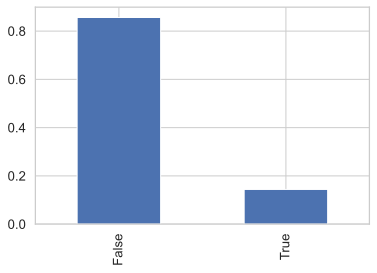

In [104]:
target_pcts = df_train_val['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

False    0.854271
True     0.145729
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

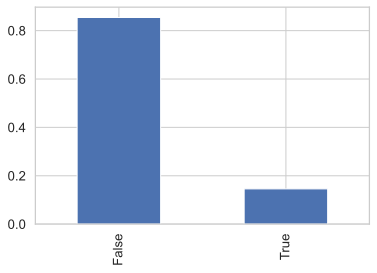

In [105]:
target_pcts = df_test['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

In [106]:
df_tr, df_val = train_test_split(df_train_val,
                                     test_size=0.2, 
                                     stratify=df_train_val['in_some_cocktail'])

In [107]:
df_tr.shape

(634, 6)

In [108]:
foods_df.columns[:10]

Index(['id', 'name', 'name_scientific', 'description', 'itis_id',
       'wikipedia_id', 'picture_file_name', 'picture_content_type',
       'picture_file_size', 'picture_updated_at'],
      dtype='object')

In [109]:
### 7. Apply one-hot-encoding on food group and subgroup columns 

In [110]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [111]:
cat_feature_columns = ['food_group', 'food_subgroup', 'food_type']

In [112]:
ohe.fit(df_tr[cat_feature_columns])
X_tr = ohe.transform(df_tr[cat_feature_columns])
X_val = ohe.transform(df_val[cat_feature_columns])
X_te  = ohe.transform(df_test[cat_feature_columns])

In [113]:
df_val

id               name                   food_group food_subgroup  \
206   207.0  arctic blackberry                       Fruits       Berries   
278   280.0            abalone                Aquatic foods      Mollusks   
986  1019.0        white bread  Cereals and cereal products       Cereals   
571   586.0           cinnamon             Herbs and Spices        Spices   
245   246.0          triticale  Cereals and cereal products       Cereals   
..      ...                ...                          ...           ...   
981  1014.0               goji                       Fruits       Berries   
499   511.0              whelk                Aquatic foods      Mollusks   
766   792.0         soy yogurt                          Soy  Soy products   
855   886.0              pomes                       Fruits         Pomes   
168   169.0                rye  Cereals and cereal products       Cereals   

    food_type in_some_cocktail  
206    Type 1            False  
278    Type 1            False  
986    Type 1            False  
571    Type 1             True  
245    Type 1            False  
..        ...              ...  
981    Type 1            False  
499    Type 1            False  
766    Type 2            False  
855   Unknown            False  
168    Type 1            False  

[159 rows x 6 columns]

In [114]:
ohe_column_names= ohe.get_feature_names()
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Eggs', 'x0_Fats and oils',
       'x0_Fruits', 'x0_Gourds', 'x0_Herbs and Spices',
       'x0_Herbs and spices', 'x0_Milk and milk products', 'x0_Nuts',
       'x0_Pulses', 'x0_Snack foods', 'x0_Soy', 'x0_Unclassified',
       'x0_Vegetables', 'x1_Alcoholic beverages', 'x1_American cuisine',
       'x1_Animal fats', 'x1_Asian cuisine', 'x1_Baking goods',
       'x1_Beans', 'x1_Berber cuisine', 'x1_Berries', 'x1_Beverages',
       'x1_Bovines', 'x1_Bread products', 'x1_Candies', 'x1_Caprae',
       'x1_Cereal products', 'x1_Cereals', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa', 'x1_Cocoa and cocoa products', 'x1_Cocoa products',
       'x1_Coffee', 'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dr

In [115]:
len(ohe_column_names)

114

In [116]:
X_tr.shape

(634, 114)

In [117]:
X_val.shape

(159, 114)

In [118]:
X_te.shape

(199, 114)

In [119]:
X_tr[:10, :10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [120]:
X_tr[:10, -10:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [121]:
ohe_column_names[20]

'x0_Unclassified'

In [122]:
X_tr[:, 20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Delete the column (`x0_Unclassified`) of the first ohe categorical feature
and delete it in the column name list

In [123]:
import numpy as np
try:
    x0_delete_item_index = np.argwhere(ohe_column_names=='x0_Unclassified')[0]
except:
    x0_delete_item_index = np.argwhere(ohe_column_names=='x0_Dishes')[0]
x0_delete_item_index

array([20])

In [124]:
x0_delete_item_index = x0_delete_item_index[0].astype(int)
type(x0_delete_item_index)

numpy.int64

In [125]:
import numpy as np
X_tr= np.delete(X_tr, x0_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x0_delete_item_index], ohe_column_names[x0_delete_item_index+1:]) )

In [126]:
X_val= np.delete(X_val, x0_delete_item_index,  axis=1)
X_te= np.delete(X_te, x0_delete_item_index,  axis=1)

In [127]:
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Eggs', 'x0_Fats and oils',
       'x0_Fruits', 'x0_Gourds', 'x0_Herbs and Spices',
       'x0_Herbs and spices', 'x0_Milk and milk products', 'x0_Nuts',
       'x0_Pulses', 'x0_Snack foods', 'x0_Soy', 'x0_Vegetables',
       'x1_Alcoholic beverages', 'x1_American cuisine', 'x1_Animal fats',
       'x1_Asian cuisine', 'x1_Baking goods', 'x1_Beans',
       'x1_Berber cuisine', 'x1_Berries', 'x1_Beverages', 'x1_Bovines',
       'x1_Bread products', 'x1_Candies', 'x1_Caprae',
       'x1_Cereal products', 'x1_Cereals', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa', 'x1_Cocoa and cocoa products', 'x1_Cocoa products',
       'x1_Coffee', 'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dressings', 'x1_Drupe

Delete the column (`x1_Unclassified`) of the second ohe categorical feature
and delete it in the column name list

In [128]:
try:
    x1_delete_item_index = np.argwhere(ohe_column_names=='x1_Unclassified')[0]
except:
    x1_delete_item_index = np.argwhere(ohe_column_names=='x1_Other dishes')[0]
x1_delete_item_index = x1_delete_item_index[0].astype(int)
x1_delete_item_index

103

In [129]:
ohe_column_names[x1_delete_item_index]

'x1_Unclassified'

In [130]:
X_tr= np.delete(X_tr, x1_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x1_delete_item_index], ohe_column_names[x1_delete_item_index+1:]) )

In [131]:
X_val= np.delete(X_val, x1_delete_item_index,  axis=1)
X_te= np.delete(X_te, x1_delete_item_index,  axis=1)

In [132]:
ohe_column_names[x1_delete_item_index]

'x1_Unfermented milks'

Delete the column (`x2_Unknown`) of the third ohe categorical feature
and delete it in the column name list

In [133]:
try:
    x2_delete_item_index = np.argwhere(ohe_column_names=='x2_Unknown')[0]
except:
    x2_delete_item_index = np.argwhere(ohe_column_names=='x2_Type 2')[0]
x2_delete_item_index = x2_delete_item_index[0].astype(int)
x2_delete_item_index

111

In [134]:
X_tr= np.delete(X_tr, x2_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x2_delete_item_index], ohe_column_names[x2_delete_item_index+1:]) )
#ohe_column_names =ohe_column_names[:-1]

In [135]:
X_val= np.delete(X_val, x2_delete_item_index,  axis=1)
X_te= np.delete(X_te, x2_delete_item_index,  axis=1)

In [136]:
assert X_tr.shape[1] == X_val.shape[1] == X_te.shape[1] == len(ohe_column_names)

In [137]:
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Eggs', 'x0_Fats and oils',
       'x0_Fruits', 'x0_Gourds', 'x0_Herbs and Spices',
       'x0_Herbs and spices', 'x0_Milk and milk products', 'x0_Nuts',
       'x0_Pulses', 'x0_Snack foods', 'x0_Soy', 'x0_Vegetables',
       'x1_Alcoholic beverages', 'x1_American cuisine', 'x1_Animal fats',
       'x1_Asian cuisine', 'x1_Baking goods', 'x1_Beans',
       'x1_Berber cuisine', 'x1_Berries', 'x1_Beverages', 'x1_Bovines',
       'x1_Bread products', 'x1_Candies', 'x1_Caprae',
       'x1_Cereal products', 'x1_Cereals', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa', 'x1_Cocoa and cocoa products', 'x1_Cocoa products',
       'x1_Coffee', 'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dressings', 'x1_Drupe

In [138]:
label_tr = pd.get_dummies(df_tr['in_some_cocktail'],drop_first=True)
label_val = pd.get_dummies(df_val['in_some_cocktail'],drop_first=True)
label_te = pd.get_dummies(df_test['in_some_cocktail'],drop_first=True)

In [139]:
label_tr.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_val.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_te.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
#y_tr

In [140]:
X_tr

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

### Utility functions

In [141]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

### 8. Do logistic regression on train set

In [142]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

from sklearn.metrics import confusion_matrix

In [143]:
X_tr

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [144]:
label_tr

Cocktail_ingredient
566                    0
163                    0
60                     1
380                    0
106                    0
..                   ...
21                     0
645                    0
327                    1
944                    0
35                     0

[634 rows x 1 columns]

In [145]:
logit = LogisticRegression(C = 0.1)
logit.fit(X_tr, label_tr)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_val, label_val)))

The score for logistic regression is
Training:  85.65%
Validation set:  85.53%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [146]:
logit.predict_proba(X_te)

array([[0.79054418, 0.20945582],
       [0.92751499, 0.07248501],
       [0.73179535, 0.26820465],
       [0.65653872, 0.34346128],
       [0.80693637, 0.19306363],
       [0.78096526, 0.21903474],
       [0.92751499, 0.07248501],
       [0.86296842, 0.13703158],
       [0.76640262, 0.23359738],
       [0.86747361, 0.13252639],
       [0.82176236, 0.17823764],
       [0.75653312, 0.24346688],
       [0.87902813, 0.12097187],
       [0.90407635, 0.09592365],
       [0.88916345, 0.11083655],
       [0.83670129, 0.16329871],
       [0.92461416, 0.07538584],
       [0.92751499, 0.07248501],
       [0.88369489, 0.11630511],
       [0.82176236, 0.17823764],
       [0.79186353, 0.20813647],
       [0.90767614, 0.09232386],
       [0.83461589, 0.16538411],
       [0.88250638, 0.11749362],
       [0.92751499, 0.07248501],
       [0.92751499, 0.07248501],
       [0.90978877, 0.09021123],
       [0.79054418, 0.20945582],
       [0.78096526, 0.21903474],
       [0.92447493, 0.07552507],
       [0.

In [147]:
thresh = .20

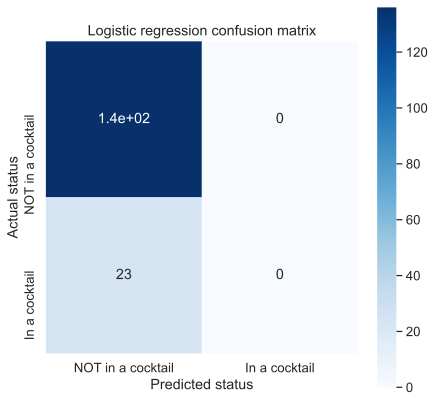

In [148]:
plt.rcParams['figure.figsize']=7,7

status = ['NOT in a cocktail', 'In a cocktail']

# Print confusion matrix for logistic regression
logit_confusion = confusion_matrix(label_val, logit.predict(X_val))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=status,
           yticklabels=status)

plt.xlabel('Predicted status')
plt.ylabel('Actual status')
plt.title('Logistic regression confusion matrix');

plt.savefig("confusion_matrix_logit_cocktail_ingredient")

In [149]:
lm_weak_reg = LogisticRegression(C = 25)  # C = regularization strength; smaller numbers are stronger
lm_weak_reg.fit(X_tr, label_tr)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=25)

In [150]:
#def make_confusion_matrix(model, threshold=0.06, model_type="Logistic Regression"):
def make_confusion_matrix(model, threshold=0.25, model_type="Logistic Regression"):
#def make_confusion_matrix(model, threshold=0.5, model_type="Logistic Regression"):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    label_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    cocktail_confusion = confusion_matrix(label_val, label_predict)
    plt.figure(dpi=80)
    sns.heatmap(cocktail_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=status,
           yticklabels=status);
    plt.title(model_type)
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [151]:
print("The score for logistic regression (weak regularization) is")
print("Training: {:6.2f}%".format(100*lm_weak_reg.score(X_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*lm_weak_reg.score(X_val, label_val)))

The score for logistic regression (weak regularization) is
Training:  91.17%
Validation set:  91.82%


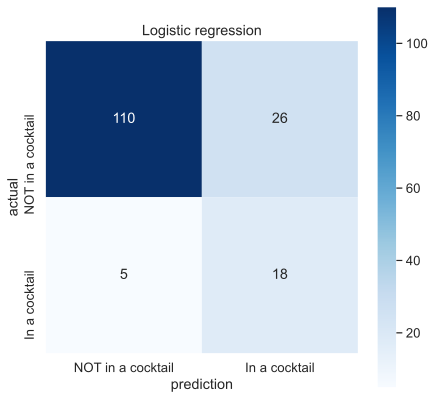

In [152]:
make_confusion_matrix(logit, thresh, model_type="Logistic regression")

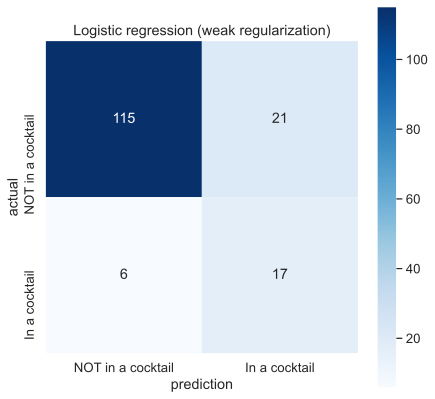

In [153]:

make_confusion_matrix(lm_weak_reg, thresh, model_type="Logistic regression (weak regularization)")

In [154]:
df_val

id               name                   food_group food_subgroup  \
206   207.0  arctic blackberry                       Fruits       Berries   
278   280.0            abalone                Aquatic foods      Mollusks   
986  1019.0        white bread  Cereals and cereal products       Cereals   
571   586.0           cinnamon             Herbs and Spices        Spices   
245   246.0          triticale  Cereals and cereal products       Cereals   
..      ...                ...                          ...           ...   
981  1014.0               goji                       Fruits       Berries   
499   511.0              whelk                Aquatic foods      Mollusks   
766   792.0         soy yogurt                          Soy  Soy products   
855   886.0              pomes                       Fruits         Pomes   
168   169.0                rye  Cereals and cereal products       Cereals   

    food_type in_some_cocktail  
206    Type 1            False  
278    Type 1            False  
986    Type 1            False  
571    Type 1             True  
245    Type 1            False  
..        ...              ...  
981    Type 1            False  
499    Type 1            False  
766    Type 2            False  
855   Unknown            False  
168    Type 1            False  

[159 rows x 6 columns]

In [155]:
label_predict = logit.predict(X_val)> thresh

In [156]:
compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-156-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


Empty DataFrame
Columns: [id, name, food_group, food_subgroup, food_type, in_some_cocktail, predicted]
Index: []

In [157]:
false_neg = misclassified[misclassified['predicted'] == False]
false_neg

id                      name                food_group  \
571   586.0                  cinnamon          Herbs and Spices   
646   666.0                      salt              Baking goods   
277   279.0  other alcoholic beverage                 Beverages   
147   148.0                    almond                      Nuts   
615   630.0                    liquor                 Beverages   
919   952.0                 rosé wine                 Beverages   
614   629.0               apple cider                 Beverages   
50     51.0           ceylon cinnamon          Herbs and Spices   
924   957.0                   red tea                      Teas   
335   341.0                   coconut                    Fruits   
897   930.0       rabbiteye blueberry                    Fruits   
650   670.0                     sugar              Baking goods   
286   288.0                  allspice          Herbs and Spices   
621   639.0                     vodka                 Beverages   
686   709.0                 chocolate  Cocoa and cocoa products   
624   642.0                       gin                 Beverages   
153   154.0            garden rhubarb                Vegetables   
82     83.0                strawberry                    Fruits   
762   788.0               fruit juice                 Beverages   
684   707.0              cocoa powder  Cocoa and cocoa products   
967  1000.0              black raisin                    Fruits   
145   146.0               sour cherry                    Fruits   
617   632.0                milk (cow)    Milk and milk products   

           food_subgroup food_type in_some_cocktail  predicted  
571               Spices    Type 1             True      False  
646           Seasonings    Type 2             True      False  
277  Alcoholic beverages    Type 2             True      False  
147                 Nuts    Type 1             True      False  
615  Distilled beverages    Type 2             True      False  
919  Fermented beverages    Type 2             True      False  
614  Fermented beverages    Type 2             True      False  
50                Spices    Type 1             True      False  
924                 Teas    Type 1             True      False  
335      Tropical fruits    Type 1             True      False  
897              Berries    Type 1             True      False  
650               Sugars    Type 2             True      False  
286               Spices    Type 1             True      False  
621  Distilled beverages    Type 2             True      False  
686       Cocoa products    Type 2             True      False  
624  Distilled beverages    Type 2             True      False  
153           Vegetables    Type 1             True      False  
82               Berries    Type 1             True      False  
762      Other beverages    Type 2             True      False  
684       Cocoa products    Type 2             True      False  
967              Berries    Type 1             True      False  
145               Drupes    Type 1             True      False  
617    Unfermented milks    Type 2             True      False

In [158]:
feature_dict = dict(zip(ohe_column_names, *logit.coef_))
feature_dict
#ranked_features =sorted(feature_dict, key=feature_dict.__getitem__)
#ranked_features

{'x0_Animal foods': -0.24424664393630433,
 'x0_Aquatic foods': -0.6350186502153187,
 'x0_Baking goods': -0.057705542041356084,
 'x0_Beverages': 1.0815718691062641,
 'x0_Cereals and cereal products': -0.19081964802255158,
 'x0_Cocoa and cocoa products': 0.309462433174613,
 'x0_Coffee and coffee products': 0.1643080781102229,
 'x0_Confectioneries': -0.04079514123521997,
 'x0_Dishes': -0.4100979375633815,
 'x0_Eggs': 0.08070401644971477,
 'x0_Fats and oils': -0.09109966541870115,
 'x0_Fruits': 0.5709640570078737,
 'x0_Gourds': -0.0022107037585984484,
 'x0_Herbs and Spices': 0.2570273927900304,
 'x0_Herbs and spices': -0.013133167754258766,
 'x0_Milk and milk products': 0.13379547365365943,
 'x0_Nuts': -0.19436290771531425,
 'x0_Pulses': -0.19240123418810437,
 'x0_Snack foods': -0.07443837461498282,
 'x0_Soy': -0.08737394627887841,
 'x0_Vegetables': -0.347246867102203,
 'x1_Alcoholic beverages': 0.12515632505491628,
 'x1_American cuisine': -0.023263918303478587,
 'x1_Animal fats': -0.04514

In [159]:
category_coef_df = pd.DataFrame(pd.Series(feature_dict).sort_values(ascending = False)).reset_index()
category_coef_df.rename(columns ={'index':'Category / subcategory', 0: 'Coefficient'}, inplace = True)


In [160]:
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Beverages', 'Category / subcategory'] = 'x1_Beverages (nonspecific)'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Cocoa and cocoa products', 'Category / subcategory'] = 'x1_Cocoa & cocoa products subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Coffee and coffee products', 'Category / subcategory'] = 'x1_Coffee & coffee products subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Teas', 'Category / subcategory'] = 'x1_Teas subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Herbs and Spices', 'Category / subcategory'] = 'x1_Herbs & Spices subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Soy', 'Category / subcategory'] = 'x1_Soy subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Fats and oils', 'Category / subcategory'] = 'x1_Fats & oils subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Cereals and cereal products', 'Category / subcategory'] = 'x1_Cereal & cereal products subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Pulses', 'Category / subcategory'] = 'x1_Pulses subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Baking goods', 'Category / subcategory'] = 'x1_Baking goods subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Other beverages', 'Category / subcategory'] = 'x1_Other beverages subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Vegetables', 'Category / subcategory'] = 'x1_Vegetables subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Fruits', 'Category / subcategory'] = 'x1_Fruits subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Milk and other milk products', 'Category / subcategory'] = 'x1_Milk & other milk products subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Nuts', 'Category / subcategory'] = 'x1_Nuts subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Eggs', 'Category / subcategory'] = 'x1_Eggs subcategory'



In [161]:
category_coef_df.loc[category_coef_df['Category / subcategory']=='x2_Type 1', 'Category / subcategory'] = 'x1_Type 1 (Unprocessed food)'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x2_Type 2', 'Category / subcategory'] = 'x1_Type 2 (Processed food)'

In [162]:

category_coef_df.replace({'Category / subcategory':r'x[012]_'}, {'Category / subcategory':''}, regex=True, inplace=True)

In [163]:
category_coef_df.tail(50)

Category / subcategory  Coefficient
61                  Pasta dishes    -0.023264
62              American cuisine    -0.023264
63                 Asian cuisine    -0.023264
64                        Doughs    -0.028048
65                Vegetable fats    -0.030474
66                       Spreads    -0.031774
67                       Bovines    -0.031842
68                       Venison    -0.031842
69               Tex-Mex cuisine    -0.034549
70               Mexican cuisine    -0.034549
71         Nutritional beverages    -0.036617
72               Confectioneries    -0.040795
73                       Seaweed    -0.044118
74               Tropical fruits    -0.044537
75                   Animal fats    -0.045143
76        Latin American cuisine    -0.045616
77                   Ground meat    -0.045616
78                    Condiments    -0.046403
79                          Peas    -0.054468
80               Leavened breads    -0.054814
81               Cereal products    -0.054814
82                  Baking goods    -0.057706
83       Beverages (nonspecific)    -0.060606
84                   Crustaceans    -0.066769
85                    Sandwiches    -0.067130
86                   Snack foods    -0.074438
87                   Snack foods    -0.074438
88                Fruit products    -0.075023
89                      Desserts    -0.076481
90                  Other dishes    -0.077593
91                   Flat breads    -0.080418
92                      Mollusks    -0.084949
93                  Soy products    -0.087374
94                           Soy    -0.087374
95                 Fats and oils    -0.091100
96                         Beans    -0.104192
97                       Poultry    -0.126690
98       Fermented milk products    -0.164487
99   Cereals and cereal products    -0.190820
100                       Pulses    -0.192401
101             Nuts subcategory    -0.194363
102                         Nuts    -0.194363
103                 Animal foods    -0.244247
104    Type 1 (Unprocessed food)    -0.263544
105                Oilseed crops    -0.281195
106                   Vegetables    -0.347247
107       Vegetables subcategory    -0.347247
108                       Fishes    -0.389739
109                       Dishes    -0.410098
110                Aquatic foods    -0.635019

In [164]:
category_coef_df[category_coef_df['Category / subcategory'] =='Cocoa and cocoa products']

Category / subcategory  Coefficient
4  Cocoa and cocoa products     0.309462

<AxesSubplot:xlabel='Coefficient', ylabel='Category / subcategory'>

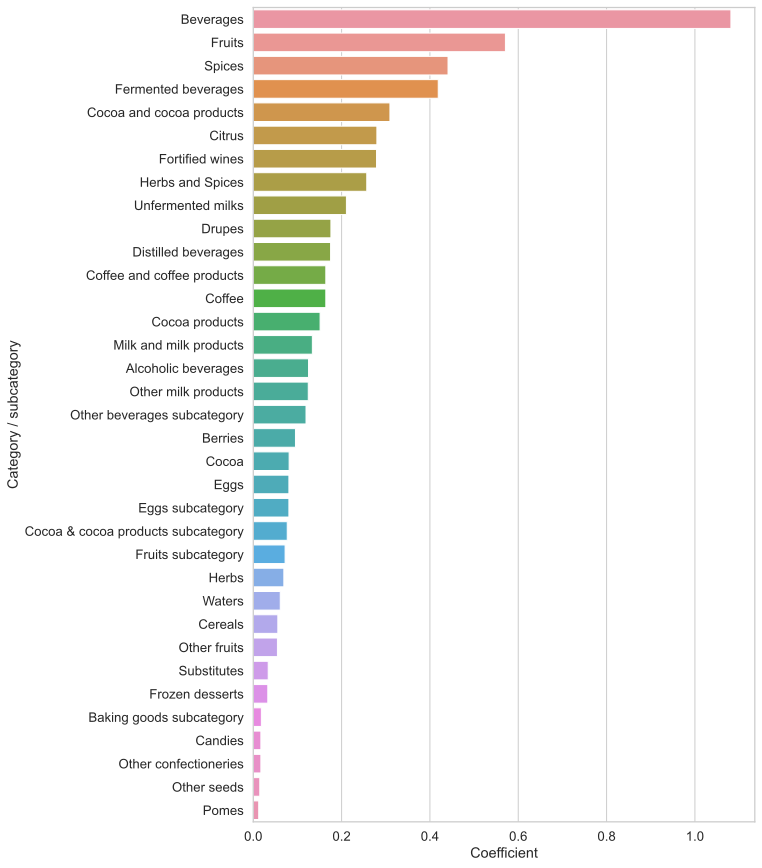

In [165]:
contributors = category_coef_df[category_coef_df['Coefficient'] > 0]
plt.rcParams['figure.figsize']=9,15
sns.barplot(data=contributors, x='Coefficient', y='Category / subcategory', ci=None)

<BarContainer object of 35 artists>

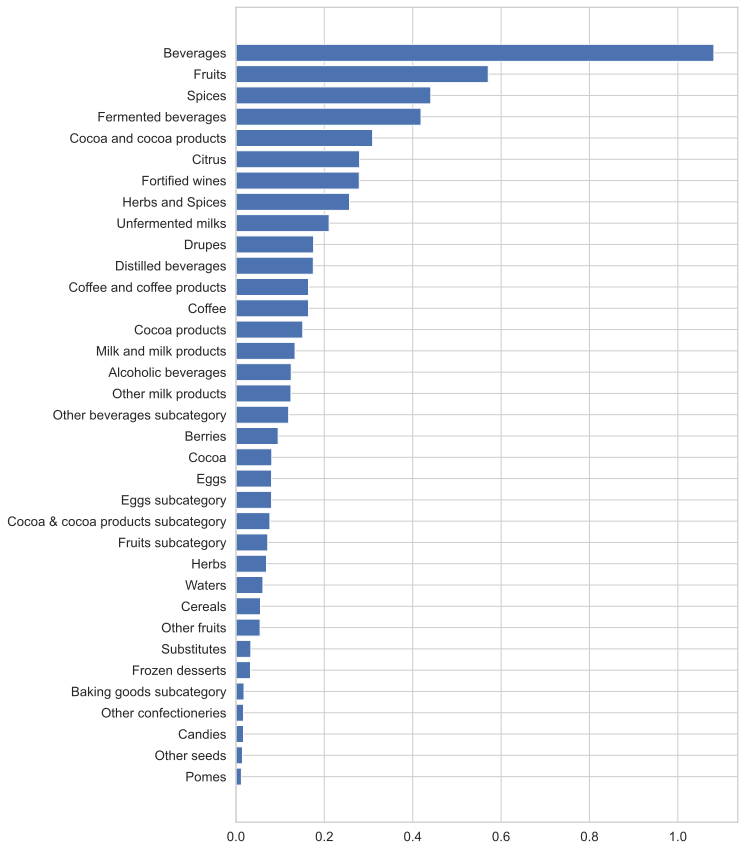

In [166]:
data= contributors.sort_values(by = 'Coefficient')
plt.barh(data['Category / subcategory'],data['Coefficient'])

<AxesSubplot:xlabel='Coefficient', ylabel='Category / subcategory'>

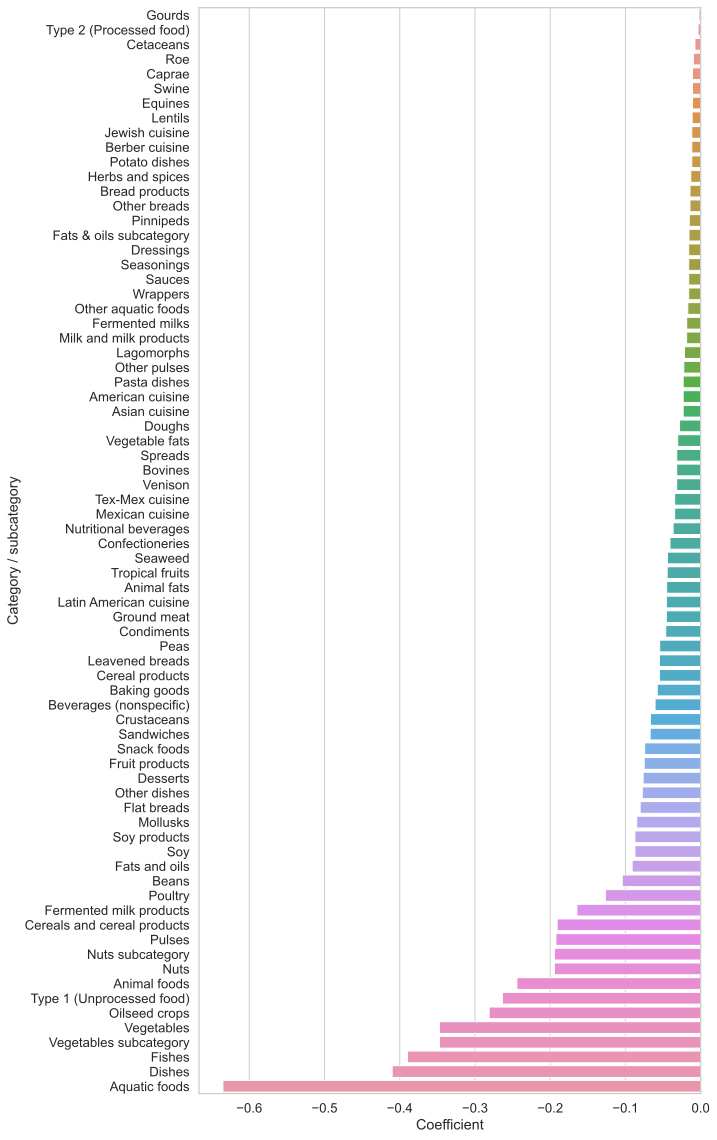

In [167]:
detractors = category_coef_df[category_coef_df['Coefficient'] < 0]
plt.rcParams['figure.figsize']=9,20
sns.barplot(data=detractors , x='Coefficient', y='Category / subcategory', ci=None)

#### KNN

In [168]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [169]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_tr, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_val, label_val)))

The score for kNN is
Training:  90.22%
Validation set:  91.82%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


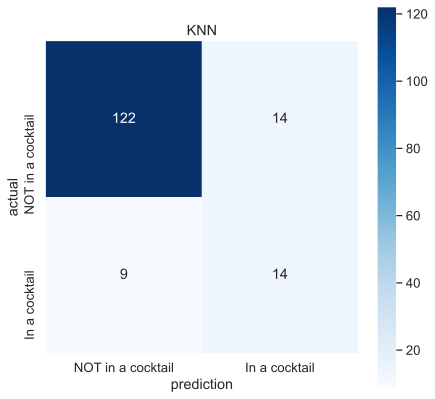

In [170]:
plt.rcParams['figure.figsize']=7,7
make_confusion_matrix(knn, model_type="KNN")

### Precision and Recall

#### Logistic

In [171]:
label_predict = logit.predict(X_val)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.0000,   Recall: 0.0000


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
thresh = 0.2
label_predict = (logit.predict_proba(X_val)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.2
Precision: 0.4091,   Recall: 0.7826


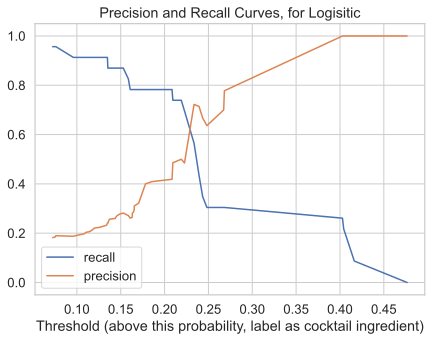

In [173]:
plt.rcParams['figure.figsize']=7,5

# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

### KNN

In [174]:
label_predict = knn.predict(X_val)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.7778,   Recall: 0.6087


In [175]:
thresh = 0.2
label_predict = (knn.predict_proba(X_val)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.2
Precision: 0.5000,   Recall: 0.6087


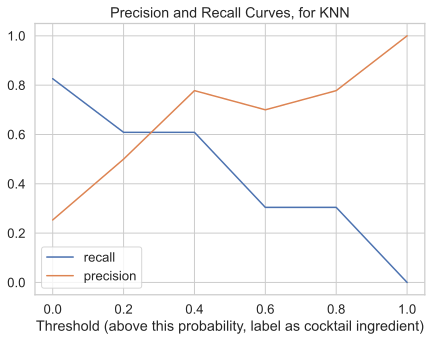

In [176]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

### F1 score

#### Logistic

In [177]:
label_predict = logit.predict(X_val)
f1_score(label_val, label_predict)

0.0

In [178]:
label_predict = (logit.predict_proba(X_val)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.537313432835821

#### KNN

In [179]:

label_predict = knn.predict(X_val)
f1_score(label_val, label_predict)

0.6829268292682927

In [180]:
label_predict = (knn.predict_proba(X_val)[:, 1] > 0.17)
f1_score(label_val, label_predict)

0.38775510204081637

### ROC curve

In [181]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_val)[:,1])

ROC AUC score, for Logistic =  0.8516624040920715


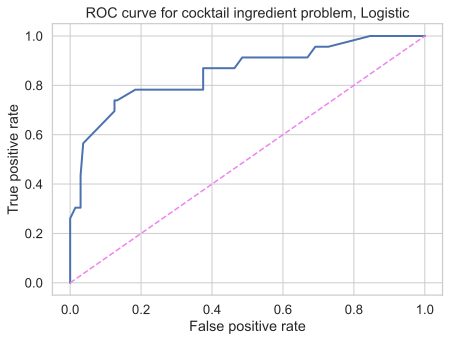

In [182]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_val)[:,1]))

In [183]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_val)[:,1])

ROC AUC score, for KNN =  0.8112212276214834


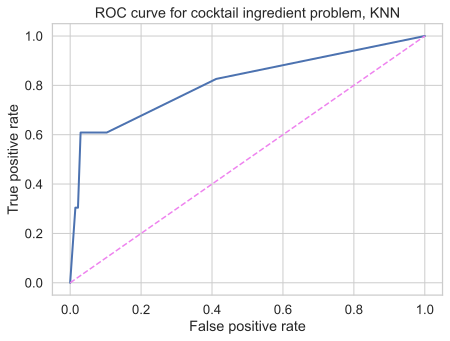

In [184]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_val)[:,1]))

### Uilitity function:   Log Loss Report

In [185]:
from sklearn.metrics import log_loss
def log_loss_report(model_names, lab_tr, X_tr, lab_val, X_val):
    print('\n')
    for m in model_names:
        tr_log_loss =  log_loss(lab_tr,  eval(m).predict_proba(X_tr))
        val_log_loss = log_loss(lab_val, eval(m).predict_proba(X_val))
        diff = val_log_loss - tr_log_loss 
        print("Log-loss:\t{0:6.4f}\t{1:6.4f}\t\tdiff =\t{2:6.4f}\t{3}\n".format(tr_log_loss, val_log_loss, diff, m))


### Log Loss Cross-Entropy

In [186]:
# print("Logistic")
# print("Log-loss on logit: {:6.4f}".format(log_loss(label_val, logit.predict_proba(X_val))))

# print("Logistic (weak regulurization)")
# print("Log-loss on logit: {:6.4f}".format(log_loss(label_val, lm.predict_proba(X_val))))

# print("KNN")
# print("Log-loss on logit: {:6.4f}".format(log_loss(label_val, knn.predict_proba(X_val)[:, 1])))


In [187]:
log_loss_report(['logit',  'knn'], label_tr, X_tr, label_val, X_val)



Log-loss:	0.3227	0.3333		diff =	0.0106	logit

Log-loss:	0.4233	1.4834		diff =	1.0601	knn



## Consider the full set of 15000+ features

In [188]:
df_train_val, df_test = train_test_split(foods_df,
                                     test_size=0.2, 
                                     random_state=42, stratify=foods_df['in_some_cocktail'])

False    0.856242
True     0.143758
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

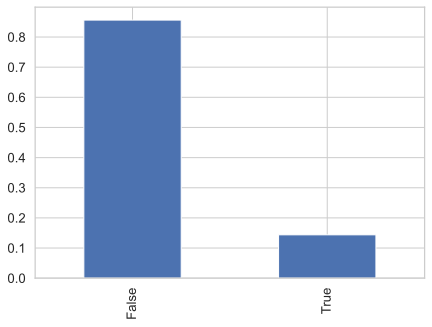

In [189]:
plt.rcParams['figure.figsize']=7,5
target_pcts = df_train_val['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

False    0.854271
True     0.145729
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

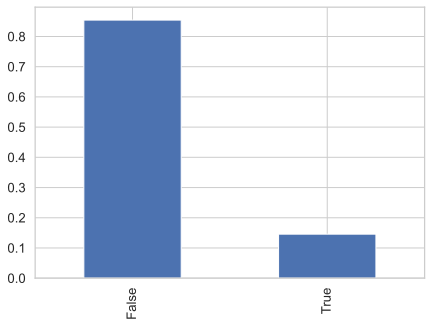

In [190]:
target_pcts = df_test['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

In [191]:
df_tr, df_val = train_test_split(df_train_val,
                                     test_size=0.2, 
                                     stratify=df_train_val['in_some_cocktail'])

In [192]:
label_tr = df_tr['in_some_cocktail']
label_val = df_val['in_some_cocktail']
label_test = df_test['in_some_cocktail']

In [193]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [194]:
cat_feature_columns = ['food_group', 'food_subgroup', 'food_type']

In [195]:
ohe.fit(df_tr[cat_feature_columns])
X_cat_tr = ohe.transform(df_tr[cat_feature_columns])
X_cat_val = ohe.transform(df_val[cat_feature_columns])
X_cat_test  = ohe.transform(df_test[cat_feature_columns])

In [196]:
ohe_column_names= ohe.get_feature_names()
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Fats and oils', 'x0_Fruits',
       'x0_Gourds', 'x0_Herbs and Spices', 'x0_Herbs and spices',
       'x0_Milk and milk products', 'x0_Nuts', 'x0_Pulses',
       'x0_Snack foods', 'x0_Soy', 'x0_Teas', 'x0_Unclassified',
       'x0_Vegetables', 'x1_Alcoholic beverages', 'x1_American cuisine',
       'x1_Animal fats', 'x1_Asian cuisine', 'x1_Baking goods',
       'x1_Beans', 'x1_Berber cuisine', 'x1_Berries', 'x1_Beverages',
       'x1_Bovines', 'x1_Bread products', 'x1_Candies', 'x1_Caprae',
       'x1_Cereal products', 'x1_Cereals',
       'x1_Cereals and cereal products', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa and cocoa products', 'x1_Cocoa products', 'x1_Coffee',
       'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled be

In [197]:
len(ohe_column_names)

116

Delete the column (`x0_Unclassified`) of the first ohe categorical feature
and delete it in the column name list

In [198]:
try:
    x0_delete_item_index = np.argwhere(ohe_column_names=='x0_Unclassified')[0]
except:
    x0_delete_item_index = np.argwhere(ohe_column_names=='x0_Dishes')[0]
x0_delete_item_index

array([20])

In [199]:
x0_delete_item_index = x0_delete_item_index[0].astype(int)
type(x0_delete_item_index)

numpy.int64

In [200]:
X_cat_tr= np.delete(X_cat_tr, x0_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x0_delete_item_index], ohe_column_names[x0_delete_item_index+1:]) )

In [201]:
X_cat_val= np.delete(X_cat_val, x0_delete_item_index,  axis=1)
X_cat_test= np.delete(X_cat_test, x0_delete_item_index,  axis=1)

In [202]:
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Fats and oils', 'x0_Fruits',
       'x0_Gourds', 'x0_Herbs and Spices', 'x0_Herbs and spices',
       'x0_Milk and milk products', 'x0_Nuts', 'x0_Pulses',
       'x0_Snack foods', 'x0_Soy', 'x0_Teas', 'x0_Vegetables',
       'x1_Alcoholic beverages', 'x1_American cuisine', 'x1_Animal fats',
       'x1_Asian cuisine', 'x1_Baking goods', 'x1_Beans',
       'x1_Berber cuisine', 'x1_Berries', 'x1_Beverages', 'x1_Bovines',
       'x1_Bread products', 'x1_Candies', 'x1_Caprae',
       'x1_Cereal products', 'x1_Cereals',
       'x1_Cereals and cereal products', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa and cocoa products', 'x1_Cocoa products', 'x1_Coffee',
       'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Dough

In [203]:
assert X_cat_tr.shape[1] == X_cat_val.shape[1] == X_cat_test.shape[1] == len(ohe_column_names)

Delete the column (x1_Unclassified) of the second ohe categorical feature and delete it in the column name list

In [204]:
try:
    x1_delete_item_index = np.argwhere(ohe_column_names=='x1_Unclassified')[0]
except:
    x1_delete_item_index = np.argwhere(ohe_column_names=='x1_Other dishes')[0]
x1_delete_item_index = x1_delete_item_index[0].astype(int)
x1_delete_item_index

105

In [205]:
ohe_column_names[x1_delete_item_index]

'x1_Unclassified'

In [206]:
X_cat_tr= np.delete(X_cat_tr, x1_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x1_delete_item_index], ohe_column_names[x1_delete_item_index+1:]) )

In [207]:
X_cat_val= np.delete(X_cat_val, x1_delete_item_index,  axis=1)
X_cat_test= np.delete(X_cat_test, x1_delete_item_index,  axis=1)

In [208]:
ohe_column_names[x1_delete_item_index]

'x1_Unfermented milks'

In [209]:
assert X_cat_tr.shape[1] == X_cat_val.shape[1] == X_cat_test.shape[1] == len(ohe_column_names)

Delete the column (`x2_Unknown`) of the third ohe categorical feature
and delete it in the column name list

In [210]:
try:
    x2_delete_item_index = np.argwhere(ohe_column_names=='x2_Unknown')[0]
except:
    x2_delete_item_index = np.argwhere(ohe_column_names=='x2_Type 2')[0]
x2_delete_item_index = x2_delete_item_index[0].astype(int)
x2_delete_item_index

113

In [211]:
len(ohe_column_names)

114

In [212]:
ohe_column_names[x2_delete_item_index]

'x2_Unknown'

In [213]:
X_cat_tr= np.delete(X_cat_tr, x2_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x2_delete_item_index], ohe_column_names[x2_delete_item_index+1:]) )
#ohe_column_names =ohe_column_names[:-1]

In [214]:
X_cat_val= np.delete(X_cat_val, x2_delete_item_index,  axis=1)
X_cat_test= np.delete(X_cat_test, x2_delete_item_index,  axis=1)

In [215]:
X_cat_tr.shape[1]

113

In [216]:
X_cat_val.shape[1]

113

In [217]:
X_cat_test.shape[1]

113

In [218]:
len(ohe_column_names)

113

In [219]:
assert X_cat_tr.shape[1] == X_cat_val.shape[1] == X_cat_test.shape[1] == len(ohe_column_names)

In [220]:
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Fats and oils', 'x0_Fruits',
       'x0_Gourds', 'x0_Herbs and Spices', 'x0_Herbs and spices',
       'x0_Milk and milk products', 'x0_Nuts', 'x0_Pulses',
       'x0_Snack foods', 'x0_Soy', 'x0_Teas', 'x0_Vegetables',
       'x1_Alcoholic beverages', 'x1_American cuisine', 'x1_Animal fats',
       'x1_Asian cuisine', 'x1_Baking goods', 'x1_Beans',
       'x1_Berber cuisine', 'x1_Berries', 'x1_Beverages', 'x1_Bovines',
       'x1_Bread products', 'x1_Candies', 'x1_Caprae',
       'x1_Cereal products', 'x1_Cereals',
       'x1_Cereals and cereal products', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa and cocoa products', 'x1_Cocoa products', 'x1_Coffee',
       'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Dough

In [221]:
label_tr = pd.get_dummies(df_tr['in_some_cocktail'],drop_first=True)
label_val = pd.get_dummies(df_val['in_some_cocktail'],drop_first=True)
label_test = pd.get_dummies(df_test['in_some_cocktail'],drop_first=True)

In [222]:
label_tr.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_val.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_test.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)

In [223]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [224]:
cont_feature_columns = foods_df.iloc[:, foods_df.columns.get_loc('orig_food_common_name')+1: -1].columns

In [225]:
cont_feature_columns

Index(['Anther_proportion', 'Aril_proportion', 'Bark_proportion',
       'Bark Essent. Oil_proportion', 'Bran_proportion', 'Branches_proportion',
       'Bud_proportion', 'Bulb_proportion', 'Calyx_proportion',
       'Caryopsis_proportion',
       ...
       'Pallidol_proportion', 'Piceatannol 3-O-glucoside_proportion',
       'Pigment A_proportion', 'Pinotin A_proportion',
       'Procyanidin trimer T2_proportion', 'Pterostilbene_proportion',
       'Trachelogenin_proportion', 'Vitisin A_proportion',
       'd-Viniferin_proportion', 'e-Viniferin_proportion'],
      dtype='object', length=8405)

In [226]:
df_tr.shape

(634, 8430)

In [227]:
df_tr[cont_feature_columns].fillna(0, inplace=True)
df_val[cont_feature_columns].fillna(0, inplace=True)
df_test[cont_feature_columns].fillna(0, inplace=True)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [228]:
ss.fit(df_tr[cont_feature_columns])
X_scaled_tr = ss.transform(df_tr[cont_feature_columns])
X_scaled_val = ss.transform(df_val[cont_feature_columns])
X_scaled_test = ss.transform(df_test[cont_feature_columns])

In [229]:
X_combo_tr = pd.concat([pd.DataFrame(X_cat_tr), pd.DataFrame(X_scaled_tr)], axis='columns')

In [230]:
X_combo_val = pd.concat([pd.DataFrame(X_cat_val), pd.DataFrame(X_scaled_val)], axis='columns')

In [231]:
X_combo_test = pd.concat([pd.DataFrame(X_cat_test), pd.DataFrame(X_scaled_test)], axis='columns')

In [232]:
X_combo_tr.fillna(0, inplace=True)
X_combo_val.fillna(0, inplace=True)
X_combo_test.fillna(0, inplace=True)

In [233]:
X_combo_tr.shape

(634, 8518)

In [234]:
np.isnan(X_combo_tr).count()

0       634
1       634
2       634
3       634
4       634
       ... 
8400    634
8401    634
8402    634
8403    634
8404    634
Length: 8518, dtype: int64

In [235]:
#X_combo_tr

### Logistic

In [236]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_combo_tr, label_tr)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.0001, max_iter=10000)

In [237]:
logit.coef_.shape

(1, 8518)

In [238]:
logit.coef_[len(ohe_column_names):len(ohe_column_names)+50]

array([], shape=(0, 8518), dtype=float64)

In [239]:
#label_tr

In [240]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_combo_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_combo_val, label_val)))

The score for logistic regression is
Training:  85.65%
Validation set:  86.16%


In [241]:
#def make_confusion_matrix(model, threshold=0.06, model_type="Logistic Regression"):
def make_confusion_matrix_custom(model, X_val, label_val,  threshold=0.25, model_type="Logistic Regression"):
#def make_confusion_matrix(model, threshold=0.5, model_type="Logistic Regression"):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    label_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    cocktail_confusion = confusion_matrix(label_val, label_predict)
    plt.figure(dpi=80)
    sns.heatmap(cocktail_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=status,
           yticklabels=status);
    plt.title(model_type)
    plt.xlabel('prediction')
    plt.ylabel('actual')

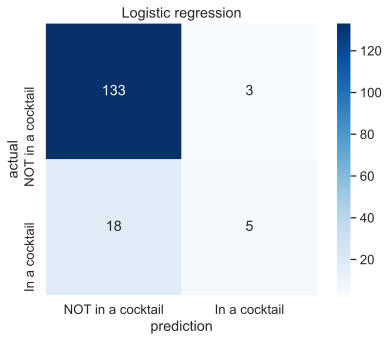

In [242]:
thresh = .22
make_confusion_matrix_custom(logit, X_combo_val, label_val, thresh, model_type="Logistic regression")

### KNN

In [243]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_combo_tr, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_combo_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_combo_val, label_val)))

The score for kNN is
Training:  88.80%
Validation set:  88.68%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


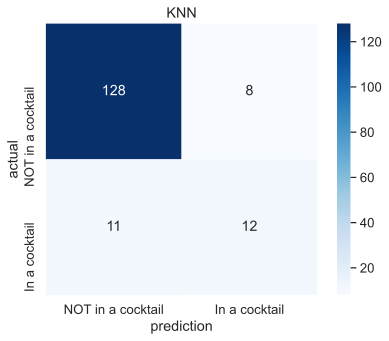

In [244]:
make_confusion_matrix_custom(knn, X_combo_val, label_val, thresh, model_type="KNN")

### Logistic

In [245]:
label_predict = logit.predict(X_combo_val)
f1_score(label_val, label_predict)

0.15384615384615383

In [246]:
label_predict = (logit.predict_proba(X_combo_val)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.37500000000000006

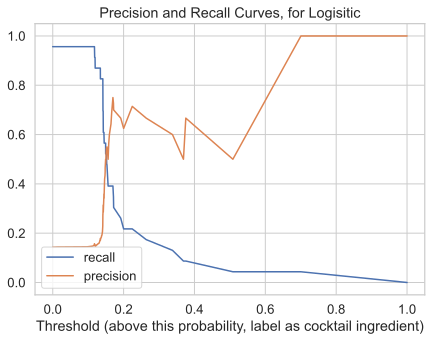

In [247]:
plt.rcParams['figure.figsize']=7,5
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_combo_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

### KNN

In [248]:
label_predict = knn.predict(X_combo_val)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 1.0000,   Recall: 0.2174


In [249]:
thresh = 0.1
label_predict = (knn.predict_proba(X_combo_val)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.1
Precision: 0.4000,   Recall: 0.7826


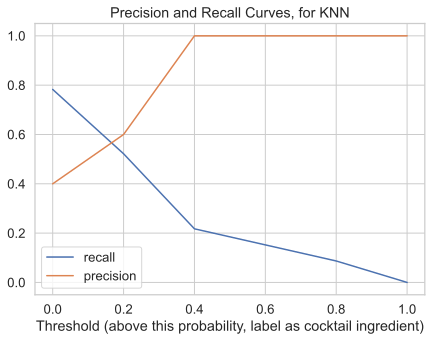

In [250]:
plt.rcParams['figure.figsize']=7,5
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_combo_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

### F1 score

#### Logistic

In [251]:
label_predict = logit.predict(X_combo_val)
f1_score(label_val, label_predict)

0.15384615384615383

In [252]:
label_predict = (logit.predict_proba(X_combo_val)[:, 1] > 0.22)
f1_score(label_val, label_predict)

0.3225806451612903

#### KNN

In [253]:
label_predict = knn.predict(X_combo_val)
f1_score(label_val, label_predict)

0.3571428571428571

In [254]:
label_predict = (knn.predict_proba(X_combo_val)[:, 1] > 0.1)
f1_score(label_val, label_predict)

0.5294117647058824

### Logistic

In [255]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_combo_val)[:,1])

ROC AUC score, for Logistic =  0.7592710997442456


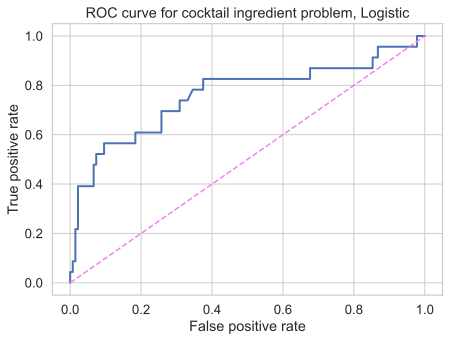

In [256]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_combo_val)[:,1]))

### KNN

In [257]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_combo_val)[:,1])

ROC AUC score, for KNN =  0.8272058823529411


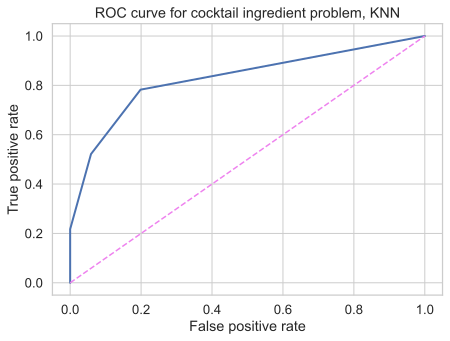

In [258]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_combo_val)[:,1]))

### Log Loss Cross-Entropy

In [259]:

log_loss_report(['logit','knn'], label_tr, X_combo_tr, label_val, X_combo_val)



Log-loss:	0.3712	0.5771		diff =	0.2059	logit

Log-loss:	0.2021	1.2438		diff =	1.0417	knn



### Consider just continuous features

### Logistic

In [260]:
X_scaled_tr= np.nan_to_num(X_scaled_tr)
X_scaled_val=np.nan_to_num(X_scaled_val)
X_scaled_test=np.nan_to_num(X_scaled_test)

In [261]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_scaled_tr, label_tr)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.0001, max_iter=10000)

In [262]:
print("The score for Logistic is")
print("Training: {:6.2f}%".format( 100*logit.score(np.array(X_scaled_tr), np.array(label_tr))))
print("Validation set: {:6.2f}%".format(100*logit.score(np.array(X_scaled_val), np.array(label_val))))

The score for Logistic is
Training:  85.65%
Validation set:  86.16%


### KNN

In [263]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_scaled_tr, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_scaled_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_scaled_val, label_val)))

The score for kNN is
Training:  87.54%
Validation set:  88.05%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Naive Bayes

In [264]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
nb = GaussianNB()


In [265]:
nb.fit(np.array(X_scaled_tr), np.array(label_tr))
print("The score for Naive Bayes is")
print("Training: {:6.2f}%".format( 100*nb.score(np.array(X_scaled_tr), np.array(label_tr))))
print("Validation set: {:6.2f}%".format(100*nb.score(np.array(X_scaled_val), np.array(label_val))))


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The score for Naive Bayes is
Training:  60.25%
Validation set:  54.09%


### Decision Tree

In [266]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

Might want to adjust tree depth

In [267]:
tree_depth = 3
d_tree = DecisionTreeClassifier(max_depth = tree_depth )
quick_test_afew_times(d_tree, X_scaled_tr, label_tr)

0.8554973821989529

In [268]:
quick_test_afew_times(d_tree, X_scaled_tr, label_tr)

0.8570680628272251

In [269]:
d_tree.fit(np.array(X_scaled_tr), np.array(label_tr))
print("The score for Decision Tree is")
print("Training: {:6.2f}%".format( 100*d_tree.score(np.array(X_scaled_tr), np.array(label_tr))))
print("Validation set: {:6.2f}%".format(100*d_tree.score(np.array(X_scaled_val), np.array(label_val))))


The score for Decision Tree is
Training:  88.49%
Validation set:  86.79%


### Random Forest

Might want to adjust the number of estimators

In [270]:
from sklearn.ensemble import RandomForestClassifier

n_estim = 2
randomforest = RandomForestClassifier(n_estimators = n_estim )
quick_test_afew_times(randomforest, X_scaled_tr, np.ravel(label_tr))


0.8450261780104713

In [271]:
randomforest.fit(np.array(X_scaled_tr), np.ravel(label_tr))
print("The score for Random Forest is")
print("Training: {:6.2f}%".format( 100*randomforest.score(np.array(X_scaled_tr), np.ravel(label_tr))))
print("Validation set: {:6.2f}%".format(100*randomforest.score(np.array(X_scaled_val), np.ravel(label_val))))


The score for Random Forest is
Training:  91.48%
Validation set:  83.65%


### XGBoost

**** Note: may be necessary to decrease the learning_rate and increase the min_child_weight to combat overfitting


In [272]:
#Evaluate models with Root Mean Squared Error
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [273]:
from xgboost import XGBClassifier, plot_importance
import xgboost
#from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [274]:
gbm = xgboost.XGBRegressor( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="reg:linear",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

In [275]:
eval_set=[(X_scaled_tr,label_tr),(X_scaled_val,label_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_scaled_tr, label_tr, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=False # to True to gives output log as below
                   )

[12:52:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [276]:
# predict using n_estimators with lowest validation error
rmse(gbm.predict(X_scaled_test, ntree_limit=gbm.best_ntree_limit),np.ravel(label_test)) 

0.34412622

In [277]:
xgb = XGBClassifier()
#xgb = XGBClassifier(learning_rate=0.050000012, min_child_weight=25 )
xgb.fit(X_scaled_tr, np.ravel(label_tr))
#quick_test_afew_times(xgb, X_scaled_tr, np.ravel(label_tr))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [278]:
dump_list = xgb.get_booster().get_dump()
num_trees = len(dump_list)
dump_list
xgb.feature_importances_

array([0.        , 0.        , 0.00026425, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [279]:
label_pred = xgb.predict(X_scaled_val)
accuracy = accuracy_score(label_val, label_pred)
print(f'XGBoost Model Accuracy: {round(accuracy, 4)*100}')

XGBoost Model Accuracy: 88.68


In [280]:
print("The score for XGBoost is")

print("Training: {:6.2f}%".format(100*xgb.score(X_scaled_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*xgb.score(X_scaled_val, label_val)))

The score for XGBoost is
Training:  96.85%
Validation set:  88.68%


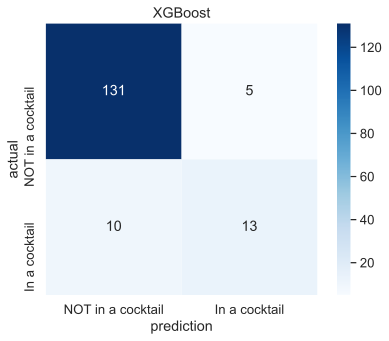

In [281]:
thresh = .2
make_confusion_matrix_custom(xgb, X_scaled_val, label_val, thresh, model_type="XGBoost")


In [282]:

compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-282-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


id                  name                name_scientific  \
787  813.0                 nance          Byrsonima crassifolia   
868  901.0                  nuts                            NaN   
38    39.0                capers               Capparis spinosa   
745  771.0         tapioca pearl                            NaN   
61    62.0       common hazelnut               Corylus avellana   
240  241.0           welsh onion              Allium fistulosum   
259  260.0       oxheart cabbage  Brassica oleracea var. conica   
225  226.0   garden onion (var.)          Allium cepa var. cepa   
689  712.0  milk (other mammals)                            NaN   
691  714.0            buttermilk                            NaN   
100  101.0              flaxseed            Linum usitatissimum   
175  176.0            rowanberry               Sorbus aucuparia   
963  996.0           green grape                            NaN   
927  960.0     white grape juice                            NaN   
204  205.0                  corn                       Zea mays   
900  933.0  evergreen blackberry               Rubus laciniatus   
325  331.0             cherimoya               Annona cherimola   
437  447.0           opium poppy             Papaver somniferum   
947  980.0  monterey jack cheese                            NaN   
753  779.0     nutritional drink                            NaN   
279  281.0               abiyuch              Crateva religiosa   
155  156.0            redcurrant                   Ribes rubrum   
876  909.0     green bell pepper                Capsicum annuum   
85    86.0             sunflower              Helianthus annuus   
211  212.0          bog bilberry           Vaccinium uliginosum   
5      6.0          garden onion                    Allium cepa   
216  217.0    european cranberry            Vaccinium oxycoccos   

                                           description   itis_id  \
787  Nance (also called craboo, kraabu, Savanna Ser...   29263.0   
868  A nut is defined botanically as a fruit compos...       NaN   
38   Capparis spinosa, the caper bush, also called ...  505885.0   
745  Tapioca is a starch extracted from Manihot esc...       NaN   
61   Corylus avellana, the Common Hazel, is a speci...  501642.0   
240  Allium fistulosum L. (Welsh onion, Japanese bu...  185463.0   
259                                                NaN       NaN   
225                                                NaN  182638.0   
689  As an agricultural product, milk is extracted ...       NaN   
691  Buttermilk refers to a number of dairy drinks....       NaN   
100  Flax (also known as common flax or linseed) is...   29226.0   
175  Sorbus aucuparia, commonly called rowan and mo...   25320.0   
963  Green seedless grapes are small to medium in s...       NaN   
927  White grape juice is typically manufactured fr...       NaN   
204  Maize (mayz; Zea mays subsp. mays, from Spanis...   42269.0   
900  Rubus laciniatus, commonly called evergreen bl...   24853.0   
325  The cherimoya, also spelled chirimoya, is the ...  506198.0   
437  Papaver somniferum, the Opium poppy, is the sp...   18894.0   
947  Monterey Jack, sometimes shortened to Jack, is...       NaN   
753  An energy drink is a type of beverage containi...       NaN   
279  The flowering tree Crateva religiosa (syn Crat...  505883.0   
155  The redcurrant (or red currant), Ribes rubrum,...  504798.0   
876  Green bell peppers are members of the domestic...   30492.0   
85   Sunflower (Helianthus annuus) is an annual pla...   36616.0   
211  Vaccinium uliginosum (Bog Bilberry or Northern...   23574.0   
5    The onion (Allium cepa) (Latin 'cepa' = onion)...   42720.0   
216  Vaccinium oxycoccos is a species of flowering ...  505635.0   

              wikipedia_id            picture_file_name picture_content_type  \
787  Byrsonima_crassifolia                      813.jpg           image/jpeg   
868            Nut_(fruit)                          NaN           

In [283]:
false_pos.to_csv('data/XGBoost_cont_false_positives.csv')

In [284]:
cont_feature_columns = foods_df.iloc[:, foods_df.columns.get_loc('orig_food_common_name')+1: -1].columns
cont_feature_column_names = foods_df[cont_feature_columns].columns
cont_feature_column_names

Index(['Anther_proportion', 'Aril_proportion', 'Bark_proportion',
       'Bark Essent. Oil_proportion', 'Bran_proportion', 'Branches_proportion',
       'Bud_proportion', 'Bulb_proportion', 'Calyx_proportion',
       'Caryopsis_proportion',
       ...
       'Pallidol_proportion', 'Piceatannol 3-O-glucoside_proportion',
       'Pigment A_proportion', 'Pinotin A_proportion',
       'Procyanidin trimer T2_proportion', 'Pterostilbene_proportion',
       'Trachelogenin_proportion', 'Vitisin A_proportion',
       'd-Viniferin_proportion', 'e-Viniferin_proportion'],
      dtype='object', length=8405)

In [285]:
im=pd.DataFrame({'importance':xgb.feature_importances_,'var':cont_feature_columns})
im=im.sort_values(by='importance',ascending=False)
im.head()

importance                                               var
486    0.064567                      Alcohol (ethanol)_proportion
556    0.038204                                Glucose_proportion
515    0.036498  Vitamin B1 (as thiamin hydrochloride)_proportion
173    0.035181                               LINALOOL_proportion
491    0.035016         Carbohydrates, total available_proportion

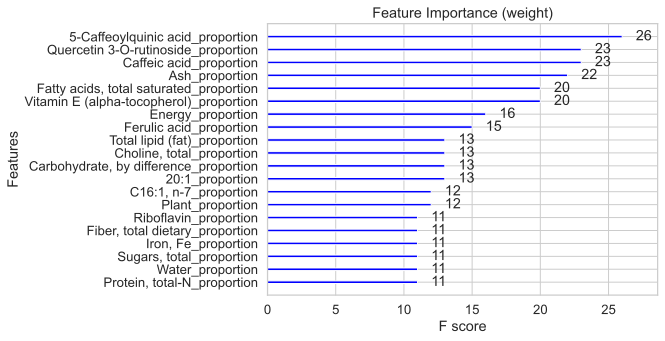

In [286]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(cont_feature_column_names)}
#mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='weight').items()}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='weight').items()}
xgboost.plot_importance(mapped, color='blue', max_num_features=20, title='Feature Importance (weight)')
plt.savefig('graphs/xgb_weight.svg', bbox_inches='tight')

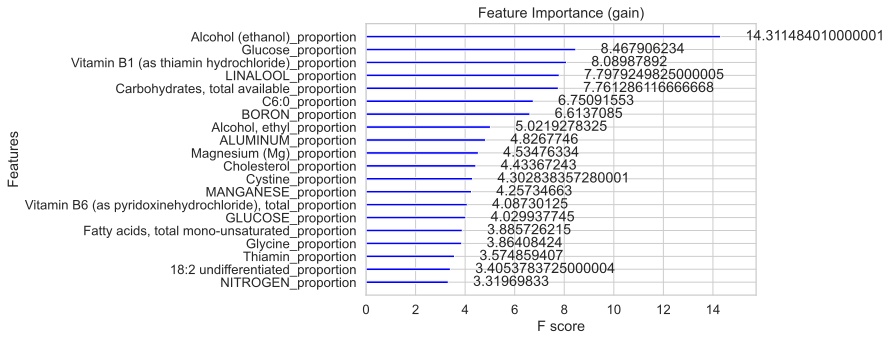

In [287]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(cont_feature_column_names)}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='gain').items()}
xgboost.plot_importance(mapped, color='blue', max_num_features=20, title='Feature Importance (gain)')
plt.savefig('graphs/xgb_gain.svg', bbox_inches='tight')

In [288]:

foods_df.iloc[:, 24:40]

Anther_proportion  Aril_proportion  Bark_proportion  \
0                  0.0              0.0              0.0   
1                  0.0              0.0              0.0   
2                  0.0              0.0              0.0   
3                  0.0              0.0              0.0   
4                  0.0              0.0              0.0   
..                 ...              ...              ...   
987                NaN              NaN              NaN   
988                0.0              0.0              0.0   
989                0.0              0.0              0.0   
990                0.0              0.0              0.0   
991                0.0              0.0              0.0   

     Bark Essent. Oil_proportion  Bran_proportion  Branches_proportion  \
0                            0.0              0.0                  0.0   
1                            0.0              0.0                  0.0   
2                            0.0              0.0                  0.0   
3                            0.0              0.0                  0.0   
4                            0.0              0.0                  0.0   
..                           ...              ...                  ...   
987                          NaN              NaN                  NaN   
988                          0.0              0.0                  0.0   
989                          0.0              0.0                  0.0   
990                          0.0              0.0                  0.0   
991                          0.0              0.0                  0.0   

     Bud_proportion  Bulb_proportion  Calyx_proportion  Caryopsis_proportion  \
0               0.0              0.0               0.0                   0.0   
1               0.0              0.0               0.0                   0.0   
2               0.0              0.0               0.0                   0.0   
3               0.0              0.0               0.0                   0.0   
4               0.0              0.0               0.0                   0.0   
..              ...              ...               ...                   ...   
987             NaN              NaN               NaN                   NaN   
988             0.0              0.0               0.0                   0.0   
989             0.0              0.0               0.0                   0.0   
990             0.0              0.0               0.0                   0.0   
991             0.0              0.0               0.0                   0.0   

     Cob_proportion  Cotyledon_proportion  Embryo_proportion  \
0               0.0               0.00000                0.0   
1               0.0               0.00000                0.0   
2               0.0               0.00000                0.0   
3               0.0               0.00000                0.0   
4               0.0               0.00000                0.0   
..              ...                   ...                ...   
987             NaN                   NaN                NaN   
988             0.0               0.00064                0.0   
989             0.0               0.00000                0.0   
990             0.0               0.00000                0.0   
991             0.0               0.00000                0.0   

     Endosperm_proportion  Epidermis_proportion  Essential Oil_proportion  
0                     0.0                   0.0                       0.0  
1                     0.0                   0.0                       0.0  
2                     0.0                   0.0                       0.0  
3                     0.0                   0.0                       0.0  
4                     0.0                   0.0                       0.0  
..                    ...                   ...                       ...  
987                   NaN                   NaN                       NaN  
988                   0.0                   0.0          

#### Logit coefficients

In [289]:

cont_feature_dict = dict(zip(cont_feature_column_names, *logit.coef_))
cont_coef_df = pd.DataFrame(pd.Series(cont_feature_dict).sort_values(ascending = False)).reset_index()
cont_coef_df.rename(columns ={'index':'Continuous features', 0: 'Coefficient'}, inplace = True)


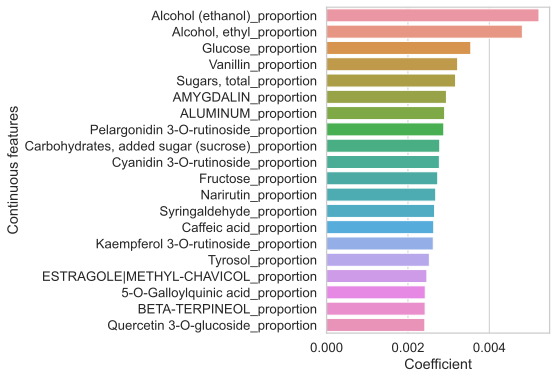

In [290]:
contributors = cont_coef_df[cont_coef_df['Coefficient'] > 0]
plt.rcParams['figure.figsize']=4,6
#plt.tight_layout(pad=3)
sns.barplot(data=contributors.head(20), x='Coefficient', y='Continuous features', ci=None)
plt.savefig('graphs/logit_cont_contributors.svg', bbox_inches='tight')

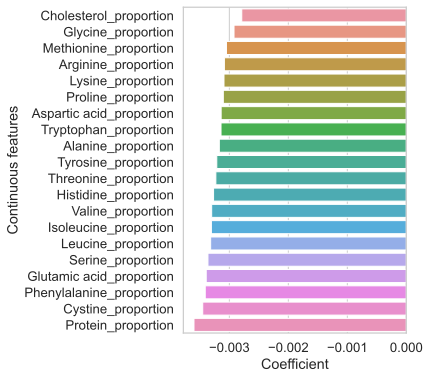

In [291]:
detractors = cont_coef_df[cont_coef_df['Coefficient'] < 0]
#fig = Figure()
plt.rcParams['figure.figsize']=4,6

sns.barplot(data=detractors.tail(20), x='Coefficient', y='Continuous features', ci=None)
plt.savefig('graphs/logit_cont_detractors.svg', bbox_inches='tight')

In [292]:
# all_coef = cont_coef_df
# #fig = Figure()
# plt.rcParams['figure.figsize']=4,6

# g =sns.barplot(data=all_coef , x='Coefficient', y='Continuous features', ci=None)
# g.set(ylabel=None)
# plt.savefig('graphs/logit_cont_all_coef.png', bbox_inches='tight')

### Log loss cross entropy

In [293]:
log_loss_report(['logit', 'knn', 'nb', 'd_tree', 'randomforest','xgb'], label_tr, X_scaled_tr, label_val, X_scaled_val )



Log-loss:	0.3714	0.5773		diff =	0.2059	logit

Log-loss:	0.2352	1.5022		diff =	1.2670	knn

Log-loss:	13.6265	15.8574		diff =	2.2309	nb

Log-loss:	0.3344	0.3653		diff =	0.0309	d_tree

Log-loss:	0.6281	2.3566		diff =	1.7285	randomforest

Log-loss:	0.0891	0.3031		diff =	0.2140	xgb



# PCA on 15000+ features

In [294]:
from sklearn.decomposition import PCA

In [295]:
#pca_ = PCA(n_components=200, random_state=2020)
pca_ = PCA(n_components=200)

pca_.fit(X_combo_tr)
X_combo_tr_pca = pca_.transform(X_combo_tr)

In [296]:
print('Variance explained by all principal components = ', sum(pca_.explained_variance_ratio_*100))

Variance explained by all principal components =  98.08804729243414


In [297]:
sns.set_style("whitegrid")
#plt.style.use('ggplot')

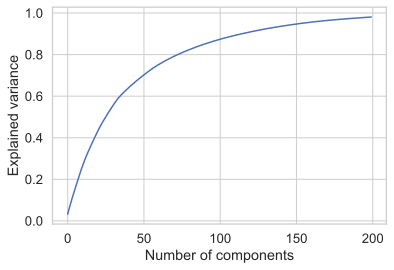

In [298]:
plt.rcParams['figure.figsize']=6,4
plt.plot(np.cumsum(pca_.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi=100)

In [299]:
components = 40

In [300]:
X_combo_tr_pca = X_combo_tr_pca[:, :components]

In [301]:
X_combo_val_pca = pca_.transform(X_combo_val)[:, :components]

In [302]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_combo_tr_pca, label_tr)




/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.0001, max_iter=10000)

In [303]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_combo_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_combo_val_pca, label_val)))

The score for logistic regression is
Training:  85.65%
Validation set:  85.53%


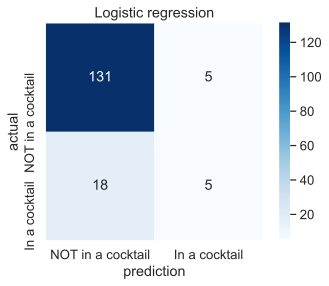

In [304]:
thresh = .2
make_confusion_matrix_custom(logit, X_combo_val_pca, label_val, thresh, model_type="Logistic regression")



In [305]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_combo_tr_pca, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_combo_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_combo_val_pca, label_val)))

The score for kNN is
Training:  90.06%
Validation set:  88.68%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


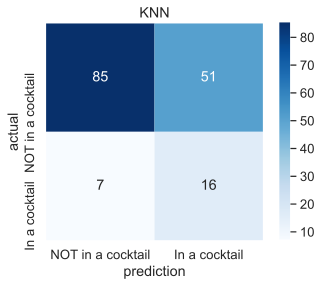

In [306]:
make_confusion_matrix_custom(knn, X_combo_val_pca, label_val, thresh, model_type="KNN")

In [307]:
label_predict = logit.predict(X_combo_val_pca)
f1_score(label_val, label_predict)

0.08

In [308]:
label_predict = (logit.predict_proba(X_combo_val_pca)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.30303030303030304

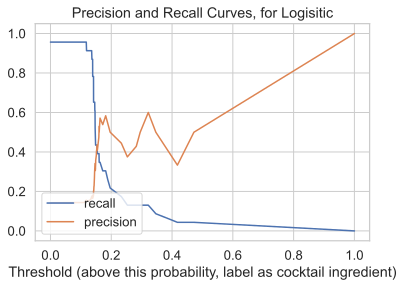

In [309]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_combo_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

In [310]:
label_predict = knn.predict(X_combo_val_pca)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.8571,   Recall: 0.2609


In [311]:
thresh = 0.1
label_predict = (knn.predict_proba(X_combo_val_pca)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.1
Precision: 0.2388,   Recall: 0.6957


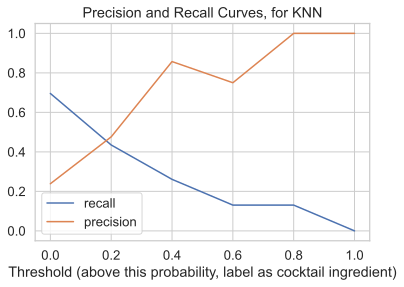

In [312]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_combo_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

In [313]:
label_predict = (knn.predict_proba(X_combo_val_pca)[:, 1] > 0.1)
f1_score(label_val, label_predict)

0.3555555555555555

In [314]:
fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_combo_val_pca)[:,1])

ROC AUC score, for Logistic =  0.7041240409207161


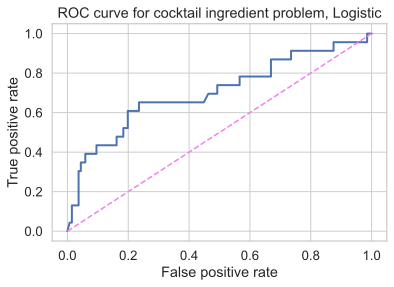

In [315]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_combo_val_pca)[:,1]))

In [316]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_combo_val_pca)[:,1])                                
                                

ROC AUC score, for KNN =  0.7226662404092071


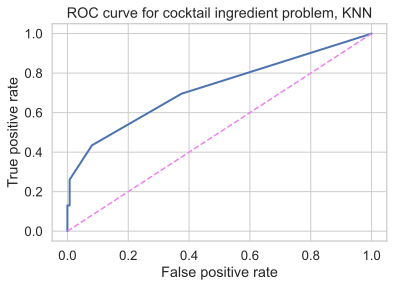

In [317]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_combo_val_pca)[:,1]))

### Log loss cross-entropy

In [318]:
log_loss_report(['logit', 'knn'], label_tr, X_combo_tr_pca, label_val, X_combo_val_pca)




Log-loss:	0.3814	0.7986		diff =	0.4171	logit

Log-loss:	0.1964	1.7124		diff =	1.5160	knn



### PCA on only the continuous features



In [319]:
X_scaled_tr= np.nan_to_num(X_scaled_tr)
X_scaled_val=np.nan_to_num(X_scaled_val)
X_scaled_test=np.nan_to_num(X_scaled_test)

In [320]:
#pca_ = PCA(n_components=components, random_state=2020)
pca_ = PCA(n_components=200)
pca_.fit(X_scaled_tr)
X_scaled_tr_pca = pca_.transform(X_scaled_tr)

In [321]:
print('Variance explained by all principal components = ', sum(pca_.explained_variance_ratio_*100))

Variance explained by all principal components =  98.15168215067565


In [322]:
plt.style.use('ggplot')
sns.set_style("whitegrid")

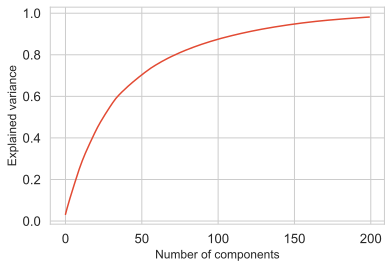

In [323]:
plt.plot(np.cumsum(pca_.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi=100)

In [324]:
components = 40

In [325]:
X_scaled_tr_pca = X_scaled_tr_pca[:, :components]

In [326]:
X_scaled_val_pca = pca_.transform(X_scaled_val)[:, :components]


In [327]:
X_scaled_test_pca = pca_.transform(X_scaled_test)[:, :components]

## Logistic

In [328]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_scaled_tr_pca, label_tr)

print("The score for Logistic is")
print("Training: {:6.2f}%".format(100*logit.score(X_scaled_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_scaled_val_pca, label_val)))

The score for Logistic is
Training:  85.65%
Validation set:  85.53%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [329]:
thresh = .2

In [330]:
label_predict = logit.predict(X_scaled_val_pca)> thresh

In [331]:
compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-331-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


id      name      name_scientific  \
100  101.0  flaxseed  Linum usitatissimum   

                                           description  itis_id wikipedia_id  \
100  Flax (also known as common flax or linseed) is...  29226.0         Flax   

    picture_file_name picture_content_type  picture_file_size  \
100           101.jpg           image/jpeg           106535.0   

          picture_updated_at  ...  Pigment A_proportion Pinotin A_proportion  \
100  2012-04-20 09:44:20 UTC  ...                   0.0                  0.0   

    Procyanidin trimer T2_proportion Pterostilbene_proportion  \
100                              0.0                      0.0   

    Trachelogenin_proportion Vitisin A_proportion  d-Viniferin_proportion  \
100                      0.0                  0.0                     0.0   

     e-Viniferin_proportion in_some_cocktail predicted  
100                     0.0            False      True  

[1 rows x 8431 columns]

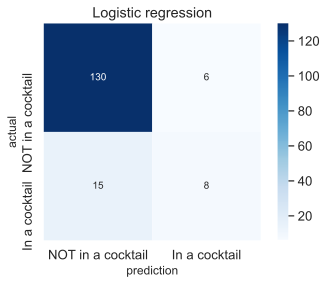

In [332]:
thresh=.17
make_confusion_matrix_custom(logit, X_scaled_val_pca, label_val, thresh, model_type="Logistic regression")


## KNN

In [333]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_scaled_tr_pca, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_scaled_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_scaled_val_pca, label_val)))

The score for kNN is
Training:  87.38%
Validation set:  75.47%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [334]:
thresh = .2

In [335]:
label_predict = knn.predict(X_scaled_val_pca)

In [336]:
compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-336-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


id                  name                  name_scientific  \
783   809.0             soy cream                              NaN   
968  1001.0       cannellini bean                              NaN   
306   310.0             wild boar                       Sus scrofa   
868   901.0                  nuts                              NaN   
901   934.0        asparagus fern               Asparagus setaceus   
961   994.0             red onion                              NaN   
850   881.0               cabbage  Brassica oleracea var. capitata   
592   607.0             sago palm                  Metroxylon sagu   
893   926.0        gentiana lutea                   Gentiana lutea   
546   561.0       common mushroom                Agaricus bisporus   
230   231.0  pepper (c. baccatum)  Capsicum baccatum var. baccatum   
71     72.0           wild carrot                    Daucus carota   
500   512.0      coalfish pollock                Pollachius virens   
265   266.0       pineappple sage                   Salvia elegans   
963   996.0           green grape                              NaN   
927   960.0     white grape juice                              NaN   
943   976.0              corn oil                              NaN   
900   933.0  evergreen blackberry                 Rubus laciniatus   
947   980.0  monterey jack cheese                              NaN   
421   430.0               ostrich                 Struthio camelus   
962   995.0           green onion                              NaN   
956   989.0                 eddoe             Colocasia antiquorum   
300   303.0                 bison                      Bison bison   
250   251.0             komatsuna    Brassica rapa var. perviridis   
94     95.0               lettuce                   Lactuca sativa   

                                           description   itis_id  \
783                                                NaN       NaN   
968  Cannellini beans are the largest of the group ...       NaN   
306  Wild boar (Sus scrofa), also known as wild pig...  180722.0   
868  A nut is defined botanically as a fruit compos...       NaN   
901  Asparagus setaceus, commonly called common asp...  193453.0   
961  Red onions are cultivars of the onion (Allium ...       NaN   
850  Cabbage (Brassica oleracea or variants) is a l...  526962.0   
592  True sago palm is a suckering (multiple-stemme...  506732.0   
893                                                NaN  505985.0   
546  Agaricus bisporus—known variously when white a...       NaN   
230  Capsicum baccatum is a species of chili pepper...  530932.0   
71   <i>Daucus carota</i>, whose common names inclu...   29477.0   
500  Saithe, Pollachius virens, is a species of mar...  164727.0   
265  Salvia elegans, commonly called Pineapple sage...  832880.0   
963  Green seedless grapes are small to medium in s...       NaN   
927  White grape juice is typically manufactured fr...       NaN   
943  Corn oil (maize oil) is oil extracted from the...       NaN   
900  Rubus laciniatus, commonly called evergreen bl...   24853.0   
947  Monterey Jack, sometimes shortened to Jack, is...       NaN   
421  The Ostrich or Common Ostrich (Struthio camelu...  174375.0   
962  Scallions (also known as green onions, spring ...       NaN   
956  Eddoe or eddo is a tropical vegetable often co...       NaN   
300  Members of the genus Bison are large, even-toe...  180706.0   
250  Komatsuna (Brassica rapa var. perviridis or ko...  532656.0   
94   Around 50 AD, lettuce leaves were often cooked...   36607.0   

           wikipedia_id                                picture_file_name  \
783                 NaN                                          809.jpg   
968                 NaN                                              NaN   
306           Wild boar                                          310.jpg   
868         Nut_(fruit)                                              NaN   
901  Asparagus_setaceus                

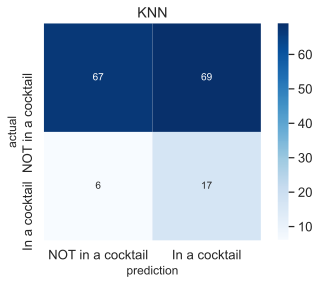

In [337]:
make_confusion_matrix_custom(knn, X_scaled_val_pca, label_val, thresh, model_type="KNN")

### Naive Bayes

In [338]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
nb = GaussianNB()

In [339]:
nb.fit(X_scaled_tr_pca, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*nb.score(X_scaled_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*nb.score(X_scaled_val_pca, label_val)))

The score for kNN is
Training:  86.28%
Validation set:  81.76%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Logistic 

In [340]:
label_predict = logit.predict(X_scaled_val_pca)
f1_score(label_val, label_predict)

0.08

In [341]:
label_predict = (logit.predict_proba(X_scaled_val_pca)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.30303030303030304

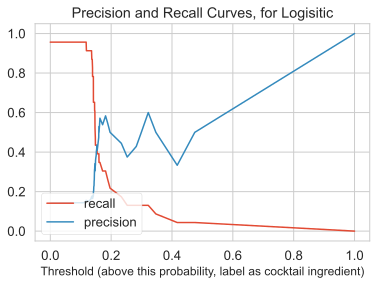

In [342]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_scaled_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

In [343]:
label_predict = knn.predict(X_scaled_val_pca)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.2647,   Recall: 0.3913


In [344]:
thresh = 0.2
label_predict = (knn.predict_proba(X_scaled_val_pca)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.2
Precision: 0.2766,   Recall: 0.5652


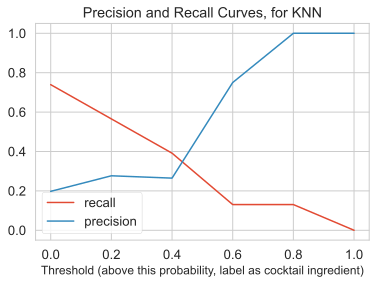

In [345]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_scaled_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

In [346]:
label_predict = (knn.predict_proba(X_scaled_val_pca)[:, 1] > 0.1)
f1_score(label_val, label_predict)

0.3119266055045871

In [347]:
fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_scaled_val_pca)[:,1])

ROC AUC score, for Logistic =  0.7006074168797953


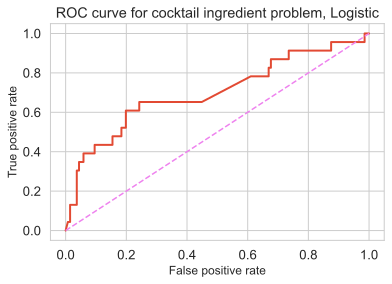

In [348]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_scaled_val_pca)[:,1]))

In [349]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_scaled_val_pca)[:,1])                                
                                

ROC AUC score, for KNN =  0.6748721227621484


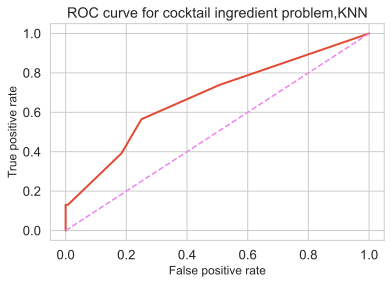

In [350]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem,KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_scaled_val_pca)[:,1]))

### Log loss cross entropy

In [351]:
log_loss_report(['logit', 'knn','nb'], label_tr, X_scaled_tr_pca, label_val, X_scaled_val_pca)

# print("Logistic")
# print("Log-loss on logit: {:6.4f}".format(log_loss(label_val, logit.predict_proba(X_scaled_val_pca)[:,1])))
# print("KNN")
# print("Log-loss on logit: {:6.4f}".format(log_loss(label_val, knn.predict_proba(X_scaled_val_pca)[:, 1])))



Log-loss:	0.3815	0.7987		diff =	0.4172	logit

Log-loss:	0.2448	1.6126		diff =	1.3678	knn

Log-loss:	3.3547	4.7718		diff =	1.4171	nb



### Combine categorical with continuous PCA

In [352]:
#X_combined_tr_pca  = np.concatenate( X_cat X_scaled_tr_pca 

In [353]:
X_combined_tr_pca = pd.concat([pd.DataFrame(X_cat_tr), pd.DataFrame(X_scaled_tr_pca)], axis='columns')

X_combined_val_pca = pd.concat([pd.DataFrame(X_cat_val), pd.DataFrame(X_scaled_val_pca)], axis='columns')

X_combined_test_pca = pd.concat([pd.DataFrame(X_cat_test), pd.DataFrame(X_scaled_test_pca)], axis='columns')

#### Logistic 

In [354]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_combined_tr_pca, label_tr)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.0001, max_iter=10000)

In [355]:
X_combined_tr_pca.shape

(634, 153)

In [356]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_combined_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_combined_val_pca, label_val)))

The score for logistic regression is
Training:  85.65%
Validation set:  85.53%


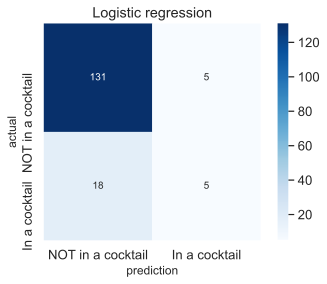

In [357]:
thresh = .2
make_confusion_matrix_custom(logit, X_combined_val_pca, label_val, thresh, model_type="Logistic regression")


#### KNN

In [358]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_combined_tr_pca, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_combined_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_combined_val_pca, label_val)))

The score for kNN is
Training:  89.75%
Validation set:  91.82%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


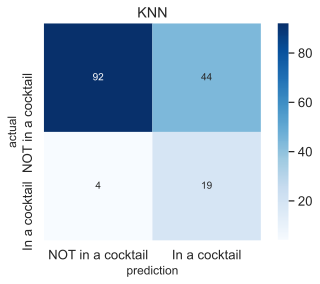

In [359]:
make_confusion_matrix_custom(knn, X_combined_val_pca, label_val, thresh, model_type="KNN")

#### XGBoost

In [360]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix

Rename columns to avoid repeated column names that arose

In [361]:
X_combined_tr_pca.columns[100:]

Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
              0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
             26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
             39],
           dtype='int64')

In [362]:
num_cat_features = len(ohe_column_names)

In [363]:
pca_column_numbering = ['pca_' + str(n) for n in range(components)]
cat_column_numbering = ['f'+str(n) for n in range(num_cat_features)]
feature_column_names = cat_column_numbering + pca_column_numbering
len(feature_column_names) 

153

In [364]:
type(X_combined_tr_pca)

pandas.core.frame.DataFrame

In [365]:
X_combined_tr_pca.columns = feature_column_names 
X_combined_tr_pca.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'pca_30', 'pca_31', 'pca_32', 'pca_33', 'pca_34', 'pca_35', 'pca_36',
       'pca_37', 'pca_38', 'pca_39'],
      dtype='object', length=153)

In [366]:
X_combined_val_pca.columns = feature_column_names 
X_combined_test_pca.columns = feature_column_names 


In [367]:
X_combined_test_pca.columns 

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'pca_30', 'pca_31', 'pca_32', 'pca_33', 'pca_34', 'pca_35', 'pca_36',
       'pca_37', 'pca_38', 'pca_39'],
      dtype='object', length=153)

 fit **XGBoost**

**** Note: it was necessary to _decrease_ the `learning_rate` and _increase_ the `min_child_weight` to combat overfitting

In [368]:

#clf = XGBClassifier()
xgb = XGBClassifier(learning_rate=0.050000012, min_child_weight=25 )
xgb.fit(X_combined_tr_pca, label_tr)

[12:52:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.050000012, max_delta_step=0, max_depth=6,
              min_child_weight=25, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [369]:
label_pred = xgb.predict(X_combined_val_pca)
accuracy = accuracy_score(label_val, label_pred)
print(f'XGBoost Model Accuracy: {round(accuracy, 4)*100}')

XGBoost Model Accuracy: 84.91


In [370]:
print("The score for XGBoost is")

print("Training: {:6.2f}%".format(100*xgb.score(X_combined_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*xgb.score(X_combined_val_pca, label_val)))

The score for XGBoost is
Training:  86.59%
Validation set:  84.91%


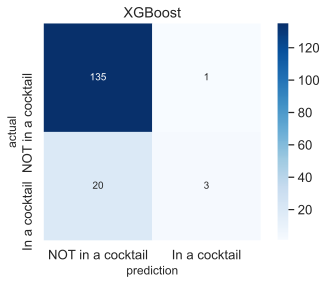

In [371]:
thresh = .4
make_confusion_matrix_custom(xgb, X_combined_val_pca, label_val, thresh, model_type="XGBoost")


In [372]:

compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-372-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


id                name                name_scientific  \
13     14.0       custard apple              Annona reticulata   
783   809.0           soy cream                            NaN   
968  1001.0     cannellini bean                            NaN   
306   310.0           wild boar                     Sus scrofa   
251   252.0            pak choy   Brassica rapa var. chinensis   
..      ...                 ...                            ...   
250   251.0           komatsuna  Brassica rapa var. perviridis   
242   243.0             shallot             Allium ascalonicum   
41     42.0           safflower           Carthamus tinctorius   
514   526.0  gadus (common cod)                          Gadus   
94     95.0             lettuce                 Lactuca sativa   

                                           description   itis_id  \
13   Custard apple, is a common name for a fruit, a...   18099.0   
783                                                NaN       NaN   
968  Cannellini beans are the largest of the group ...       NaN   
306  Wild boar (Sus scrofa), also known as wild pig...  180722.0   
251  Chinese cabbage (Brassica rapa, subspecies pek...       NaN   
..                                                 ...       ...   
250  Komatsuna (Brassica rapa var. perviridis or ko...  532656.0   
242  The shallot (Allium cepa var. aggregatum, or t...  506481.0   
41   Safflower is a highly branched, herbaceous, th...  501305.0   
514  Gadus is a genus of demersal fish in the famil...  164710.0   
94   Around 50 AD, lettuce leaves were often cooked...   36607.0   

      wikipedia_id picture_file_name picture_content_type  picture_file_size  \
13   Custard apple            14.jpg           image/jpeg            29242.0   
783            NaN           809.jpg           image/jpeg            45680.0   
968            NaN               NaN                  NaN                NaN   
306      Wild boar           310.jpg           image/jpeg           122002.0   
251       Pak_choy           252.jpg           image/jpeg            77361.0   
..             ...               ...                  ...                ...   
250      Komatsuna           251.jpg           image/jpeg            53375.0   
242        Shallot           243.jpg           image/jpeg           341911.0   
41       Safflower            42.jpg           image/jpeg            61156.0   
514          Gadus           526.jpg           image/jpeg           196359.0   
94         Lettuce            95.jpg           image/jpeg            96800.0   

          picture_updated_at  ...  Pigment A_proportion Pinotin A_proportion  \
13   2012-04-20 09:30:49 UTC  ...                   0.0                  0.0   
783  2012-04-20 09:42:39 UTC  ...                   0.0                  0.0   
968                      NaN  ...                   NaN                  NaN   
306                      NaN  ...                   NaN                  NaN   
251  2012-04-20 09:28:58 UTC  ...                   0.0                  0.0   
..                       ...  ...                   ...                  ...   
250  2012-04-20 09:37:06 UTC  ...                   NaN                  NaN   
242  2012-04-20 09:36:06 UTC  ...                   0.0                  0.0   
41   2012-04-20 09:30:28 UTC  ...                   0.0                  0.0   
514  2012-04-20 09:29:55 UTC  ...                   0.0                  0.0   
94   2012-04-20 09:34:18 UTC  ...                   0.0                  0.0   

    Procyanidin trimer T2_proportion Pterostilbene_proportion  \
13                               0.0                      0.0   
783                              0.0                      0.0   
968                              NaN                      NaN   
306                              NaN                      NaN   
251                              0.0                      0.0   
..                               ...                      ...   
250                   

In [373]:
false_pos.to_csv('data/XGBoost_cat_cont_false_positives.csv')

#### SVC (Support Vector Machines)

In [374]:
from sklearn.svm import LinearSVC, SVC

In [375]:
svt_clf = SVC().fit(np.array(X_combined_tr_pca), np.array(label_tr))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [376]:
label_pred = svt_clf.predict(X_combined_val_pca)
accuracy = accuracy_score(label_val, label_pred)
print(f'SVctM Model Accuracy: {round(accuracy, 4)*100}')

SVctM Model Accuracy: 86.16


In [377]:
print("The score for SVCtM is")

print("Training: {:6.2f}%".format(100*svt_clf.score(X_combined_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*svt_clf.score(X_combined_val_pca, label_val)))

The score for SVCtM is
Training:  88.49%
Validation set:  86.16%


In [378]:
# thresh = .2
# make_confusion_matrix_custom(svt_clf, X_combined_val_pca, label_val, thresh, model_type="SVCt")


### Logistic

In [379]:
label_predict = logit.predict(X_combined_val_pca)
f1_score(label_val, label_predict)

0.08

In [380]:
label_predict = (logit.predict_proba(X_combined_val_pca)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.30303030303030304

In [381]:
label_predict = logit.predict(X_combined_val_pca)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))



Default threshold:
Precision: 0.5000,   Recall: 0.0435


In [382]:
thresh = 0.2
label_predict = (logit.predict_proba(X_combined_val_pca)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.2
Precision: 0.5000,   Recall: 0.2174


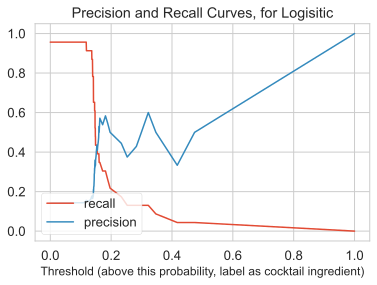

In [383]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_combined_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

### KNN

In [384]:
label_predict = knn.predict(X_combined_val_pca)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.9167,   Recall: 0.4783


In [385]:
thresh = 0.1
label_predict = (knn.predict_proba(X_combined_val_pca)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.1
Precision: 0.3016,   Recall: 0.8261


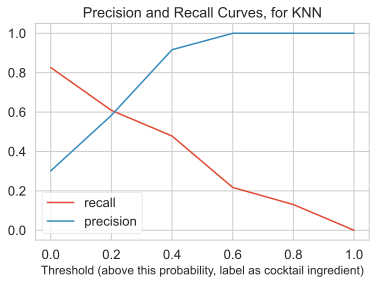

In [386]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_combined_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

### XGBoost

In [387]:
label_predict = xgb.predict(X_combined_val_pca)
f1_score(label_val, label_predict)


0.0

In [388]:
label_predict = (xgb.predict_proba(X_combined_val_pca)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.32098765432098764

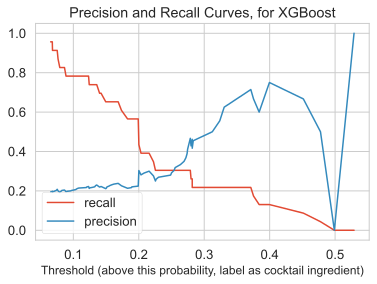

In [389]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, xgb.predict_proba(X_combined_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for XGBoost');

### SVct M

In [390]:
X_combined_val_pca.shape

(159, 153)

In [391]:
# label_predict = svm.predict(np.array(X_combined_val_pca))
# f1_score(np.array(label_val), label_predict)

In [392]:
# label_predict = (svm.predict_proba(X_combined_val_pca)[:, 1] > 0.2)
# f1_score(label_val, label_predict)

In [393]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

# precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, svm.predict_proba(X_combined_val_pca)[:,1] )

# plt.figure(dpi=80)
# plt.plot(threshold_curve, recall_curve[1:], label='recall')
# plt.plot(threshold_curve, precision_curve[1:],label='precision')
# plt.legend(loc='lower left')
# plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
# plt.title('Precision and Recall Curves, for XGBoost');

### Logistic ROC

In [394]:
fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for Logistic =  0.7108375959079284


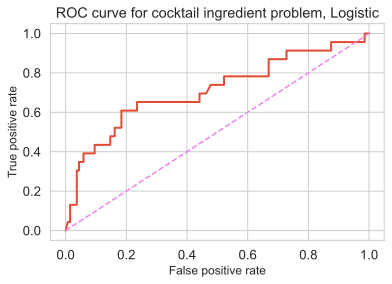

In [395]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_combined_val_pca)[:,1]))

### KNN

In [396]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_combined_val_pca)[:,1])      

ROC AUC score, for Logistic =  0.8355179028132993


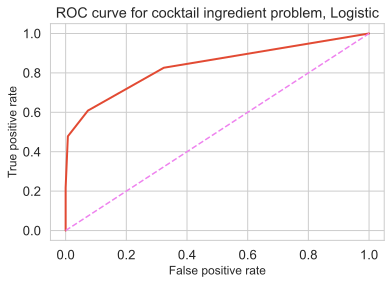

In [397]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, knn.predict_proba(X_combined_val_pca)[:,1]))

### XGBoost

In [398]:
fpr, tpr, thresholds = roc_curve(label_val, xgb.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for XGBoost =  0.7204283887468031


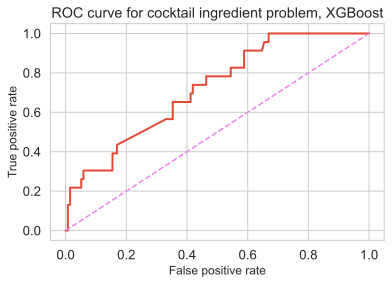

In [399]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, XGBoost');
print("ROC AUC score, for XGBoost = ", roc_auc_score(label_val, xgb.predict_proba(X_combined_val_pca)[:,1]))

### Log loss cross entropy

In [400]:
log_loss_report(['logit', 'knn','xgb'], label_tr, X_combined_tr_pca, label_val, X_combined_val_pca)# fpr, tpr, thresholds = roc_curve(label_val, svm.predict_proba(X_combined_val_pca)[:,1])



Log-loss:	0.3813	0.7984		diff =	0.4171	logit

Log-loss:	0.1974	1.0413		diff =	0.8439	knn

Log-loss:	0.3179	0.3713		diff =	0.0534	xgb



# Oversampling

In [401]:
# Now add some random oversampling of the minority classes
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=0)
X_resampled, label_resampled = ros.fit_sample(np.array(X_combined_tr_pca),np.array(label_tr))

In [402]:
# Yay, balanced classes!
Counter(label_resampled)

Counter({0: 543, 1: 543})

In [403]:
#X_resampled = pd.DataFrame(X_resampled)
#X_resampled.columns = feature_column_names 

### Logistic

In [404]:
logit = LogisticRegression(C = .0003,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_resampled, label_resampled)


LogisticRegression(C=0.0003, max_iter=10000)

In [405]:
X_resampled.shape

(1086, 153)

In [406]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_resampled, label_resampled)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_combined_val_pca, label_val)))


The score for logistic regression is
Training:  72.47%
Validation set:  72.96%


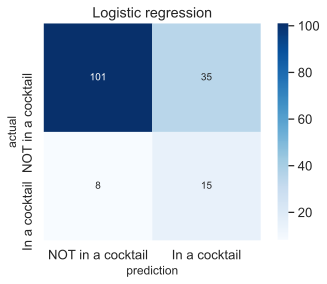

In [407]:
thresh = .5
make_confusion_matrix_custom(logit, X_combined_val_pca, label_val, thresh, model_type="Logistic regression")


### KNN

In [408]:
knn = KNeighborsClassifier(n_neighbors=8) # set number of neighbors to 20
knn.fit(X_resampled, label_resampled)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_resampled, label_resampled)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_combined_val_pca, label_val)))

The score for kNN is
Training:  88.40%
Validation set:  75.47%


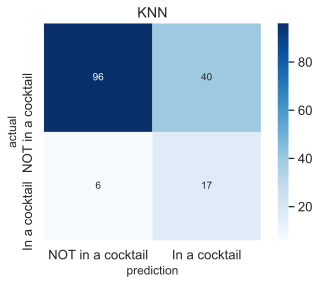

In [409]:
thresh = .5
make_confusion_matrix_custom(knn, X_combined_val_pca, label_val, thresh, model_type="KNN")



### XGBoost

In [410]:
#clf = XGBClassifier().fit(X_resampled, label_resampled)
xgb= XGBClassifier(learning_rate=0.001000012, min_child_weight=35 ).fit(X_resampled, label_resampled)
#clf = XGBClassifier(learning_rate=0.1000012, min_child_weight=17 ).fit(X_resampled, label_resampled)

[12:52:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [411]:
#X_combined_val_pca.columns 

In [412]:
label_pred = xgb.predict(np.array(X_combined_val_pca))
accuracy = accuracy_score(label_val, label_pred)

In [413]:
print(f'XGBoost Model Accuracy: {round(accuracy, 4)*100}')

print("The score for XGBoost is")

print("Training: {:6.2f}%".format(100*xgb.score(np.array(X_resampled), label_resampled)))
print("Validation set: {:6.2f}%".format(100*xgb.score(np.array(X_combined_val_pca), label_val)))


XGBoost Model Accuracy: 58.489999999999995
The score for XGBoost is
Training:  74.49%
Validation set:  58.49%


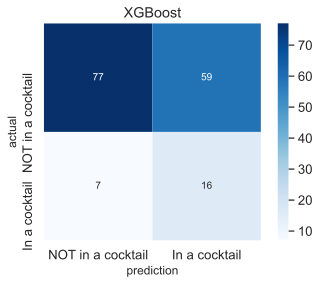

In [414]:
thresh = .5
make_confusion_matrix_custom(xgb, X_combined_val_pca, label_val, thresh, model_type="XGBoost")


### Logistic

In [415]:
label_predict = logit.predict(np.array(X_combined_val_pca))
f1_score(label_val, label_predict)


0.410958904109589

In [416]:
label_predict = (logit.predict_proba(np.array(X_combined_val_pca))[:, 1] > 0.5)
f1_score(label_val, label_predict)

0.410958904109589

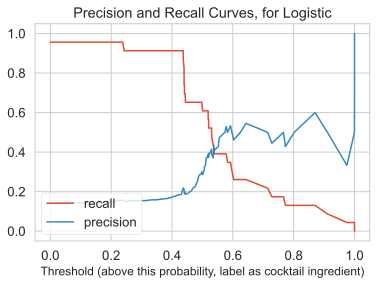

In [417]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(np.array(X_combined_val_pca))[:,1] )
                                                                       
plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logistic');

### KNN

In [418]:
label_predict = knn.predict(np.array(X_combined_val_pca))
f1_score(label_val, label_predict)


0.4657534246575342

In [419]:
label_predict = (knn.predict_proba(np.array(X_combined_val_pca))[:, 1] > 0.5)
f1_score(label_val, label_predict)

0.4657534246575342

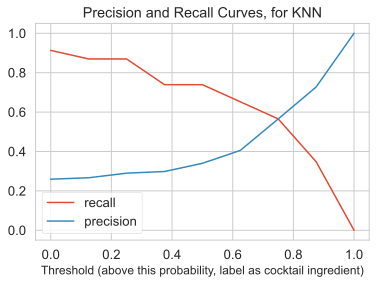

In [420]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(np.array(X_combined_val_pca))[:,1] )
                                                                       
plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

### XGBoost

In [421]:
label_predict = xgb.predict(np.array(X_combined_val_pca))
f1_score(label_val, label_predict)


0.32653061224489793

In [422]:
label_predict = (xgb.predict_proba(np.array(X_combined_val_pca))[:, 1] > 0.3)
f1_score(label_val, label_predict)


0.25274725274725274

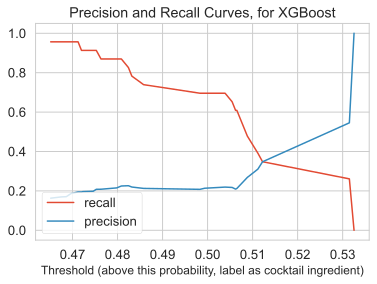

In [423]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, xgb.predict_proba(np.array(X_combined_val_pca))[:,1] )
                                                                       
plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for XGBoost');

### Logistic

In [424]:
fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for Logistic =  0.7319373401534527


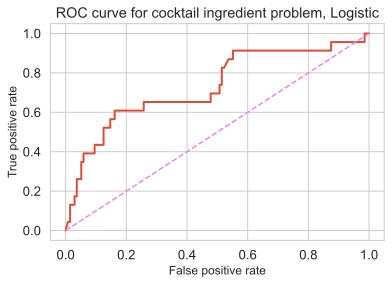

In [425]:


plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_combined_val_pca)[:,1]))

### KNN

In [426]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for KNN =  0.8342391304347826


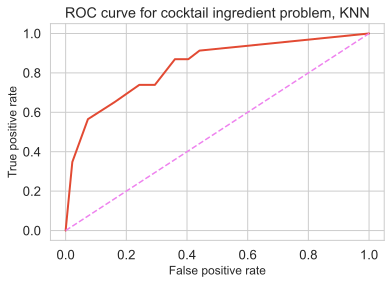

In [427]:

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_combined_val_pca)[:,1]))

In [428]:
sns.set_style("whitegrid")

### XGBoost

In [429]:
fpr, tpr, thresholds = roc_curve(label_val, xgb.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for XGBoost =  0.7199488491048593


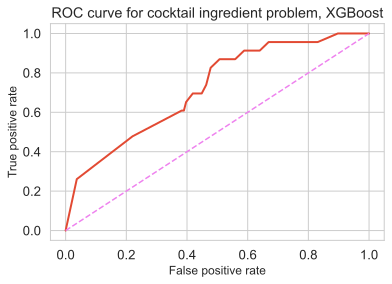

In [430]:

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, XGBoost');
print("ROC AUC score, for XGBoost = ", roc_auc_score(label_val, xgb.predict_proba(X_combined_val_pca)[:,1]))

In [431]:
ohe_column_names_list = list(ohe_column_names)
ohe_column_names_list = [w.replace('x1_Type 1', 'x1_Type 2 (Unprocessed food)') for w in ohe_column_names_list]
ohe_column_names_list = [w.replace('x1_Type 2', 'x1_Type 2 (Processed food)') for w in ohe_column_names_list]
ohe_column_names_list = [w.replace('x0_', '') for w in ohe_column_names_list]
ohe_column_names_list = [w.replace('x1_', '') for w in ohe_column_names_list]
ohe_column_names_list = [w.replace('x2_', '') for w in ohe_column_names_list]

                         
                         

In [432]:

all_feature_names = ohe_column_names_list
all_feature_names.extend(list(cont_feature_column_names))
all_feature_names

['Animal foods',
 'Aquatic foods',
 'Baking goods',
 'Beverages',
 'Cereals and cereal products',
 'Cocoa and cocoa products',
 'Coffee and coffee products',
 'Confectioneries',
 'Dishes',
 'Fats and oils',
 'Fruits',
 'Gourds',
 'Herbs and Spices',
 'Herbs and spices',
 'Milk and milk products',
 'Nuts',
 'Pulses',
 'Snack foods',
 'Soy',
 'Teas',
 'Vegetables',
 'Alcoholic beverages',
 'American cuisine',
 'Animal fats',
 'Asian cuisine',
 'Baking goods',
 'Beans',
 'Berber cuisine',
 'Berries',
 'Beverages',
 'Bovines',
 'Bread products',
 'Candies',
 'Caprae',
 'Cereal products',
 'Cereals',
 'Cereals and cereal products',
 'Cetaceans',
 'Citrus',
 'Cocoa and cocoa products',
 'Cocoa products',
 'Coffee',
 'Condiments',
 'Crustaceans',
 'Desserts',
 'Distilled beverages',
 'Doughs',
 'Dressings',
 'Drupes',
 'Equines',
 'Fats and oils',
 'Fermented beverages',
 'Fermented milk products',
 'Fermented milks',
 'Fishes',
 'Flat breads',
 'Fortified wines',
 'Frozen desserts',
 'Fruit 

In [433]:
sns.set_style("whitegrid")

<AxesSubplot:title={'center':'Feature Importance (weight)'}, xlabel='F score', ylabel='Features'>

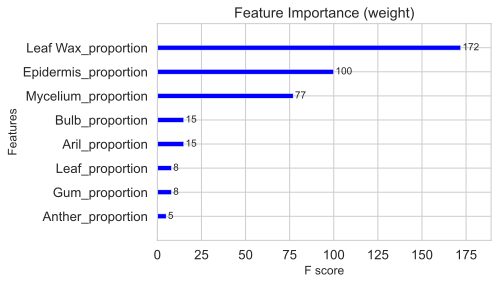

In [434]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(all_feature_names)}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='weight').items()}
xgboost.plot_importance(mapped, color='blue', max_num_features=20, title='Feature Importance (weight)')

<AxesSubplot:title={'center':'Feature Importance (gain)'}, xlabel='F score', ylabel='Features'>

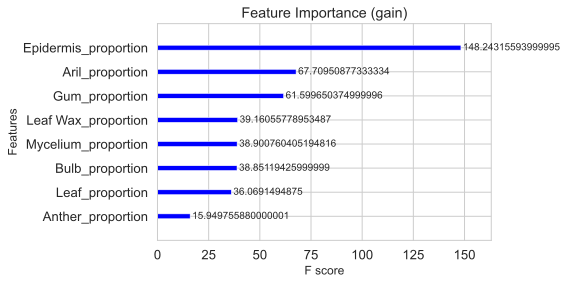

In [435]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(all_feature_names)}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='gain').items()}
xgboost.plot_importance(mapped, color='blue', max_num_features=20, title = 'Feature Importance (gain)')

In [436]:
# def log_loss_report(model_names, lab_tr, X_tr, lab_val, X_val):
#     print('\n')
#     for m in model_names:
#         tr_log_loss =  log_loss(lab_tr,  eval(m).predict_proba(X_tr))
#         val_log_loss = log_loss(lab_val, eval(m).predict_proba(X_val))
#         diff = val_log_loss - tr_log_loss 
#         print("Log-loss: {0:6.4f}  {1:6.4f}  diff=  {2:6.4f}    {3}\n".format(tr_log_loss, val_log_loss, diff, m))


In [437]:
log_loss_report(['logit','knn','xgb'],label_tr, X_combined_tr_pca, label_val, X_combined_val_pca  )




Log-loss:	0.5563	1.0635		diff =	0.5072	logit

Log-loss:	0.2893	1.4676		diff =	1.1784	knn

Log-loss:	0.6683	0.6764		diff =	0.0080	xgb



## SVct m

In [438]:
# thresh = .2
# make_confusion_matrix_custom(svt_clf, X_combined_val_pca, label_val, thresh, model_type="SVCt")